<a href="https://colab.research.google.com/github/Raweekan59/CO2-Emission-from-Agrofood-sector/blob/main/agrofood_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#View Updated dataset

In [ ]:
import pandas as pd

# Load the updated dataset
df = pd.read_csv('updated_agrofood.csv')

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             6871 non-null   int64  
 1   Area                             6871 non-null   object 
 2   Savanna fires                    6871 non-null   float64
 3   Forest fires                     6871 non-null   float64
 4   Crop Residues                    6871 non-null   float64
 5   Rice Cultivation                 6871 non-null   float64
 6   Drained organic soils (CO2)      6871 non-null   float64
 7   Pesticides Manufacturing         6871 non-null   float64
 8   Food Transport                   6871 non-null   float64
 9   Forestland                       6871 non-null   float64
 10  Net Forest conversion            6871 non-null   float64
 11  Food Household Consumption       6871 non-null   float64
 12  Food Retail         

,Year,Area,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,1990,Afghanistan,14.7237,0.0557,205.6077,686.000000,0.0000,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,0.0000,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,1990,Albania,5.5561,7.0253,59.2391,23.520000,110.5705,2.000000,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
2,1990,Algeria,55.6487,89.0459,164.2776,4.312000,0.0000,104.000000,1584.4410,-111.1403,...,225.2199,0.0,0.0,71.5838,12415865.0,13496502.0,12970400.0,12547674.0,22326.596965,1.005583
3,1990,American Samoa,0.0000,0.0000,0.0000,926.342278,0.0000,11.481085,16.9802,-58.8991,...,0.0000,0.0,0.0,41.4996,8962.0,38076.0,24538.0,23281.0,5299.122499,0.566500
4,1990,Andorra,0.0000,0.0000,0.0000,926.342278,0.0000,11.481085,32.7588,0.0000,...,0.0000,0.0,0.0,57.6996,2882.0,51627.0,28390.0,25179.0,5576.553292,1.278500


In [ ]:
# Find duplicated Year & Area entries
duplicates = df[df.duplicated(subset=['Year', 'Area'], keep=False)]

# Display count and first few rows
print(f"Total duplicate rows: {len(duplicates)}")
duplicates.head()


Total duplicate rows: 0


,Year,Area,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C


In [ ]:
# Check missing values for each column
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("Missing Values in Dataset:\n", missing_values)


Missing Values in Dataset:
 Series([], dtype: int64)


In [ ]:
print( f"{df.columns=}" )

df.columns=Index(['Year', 'Area', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


Merge continent dataset

In [ ]:
rg=pd.read_csv("continents.csv")
rg

,Area,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia
...,...,...,...
244,Wallis and Futuna,Oceania,Polynesia
245,Western Sahara,Africa,Northern Africa
246,Yemen,Asia,Western Asia
247,Zambia,Africa,Sub-Saharan Africa


In [ ]:
#Fix country name that was changed overtime
df['Area'] = df['Area'].replace( 'Czech Republic','Czechia')

In [ ]:
area_name_mapping = {
  'Virgin Islands (British)':'British Virgin Islands' ,
 'Brunei Darussalam':'Brunei',
  'Cabo Verde':'Cape Verde',
  'Congo (Democratic Republic Of The)': 'Congo (Kinshasa)',
 'Falkland Islands (Malvinas)':'Falkland Islands',
 'Guinea Bissau': 'Guinea-Bissau',
  'Macao':'Macau' ,
 'Korea, Republic of': 'North Korea',
  'Palestine, State of':'Palestine',
 'Saint Helena, Ascension and Tristan da Cunha':'Saint Helena',
 'Sao Tome and Principe':'São Tomé and Príncipe',
'Virgin Islands (U.S.)':  'United States Virgin Islands',
'United States': 'United States of America',
  'Vatican':'Vatican',
  'Micronesia (Federated States of)':'Micronesia',
 'Bosnia And Herzegovina':'Bosnia and Herzegovina',
 'Holy See': 'Vatican' ,
  'Macedonia':'North Macedonia',
  'Czech Republic':'Czechia'

    # Add more mappings as needed
}

In [ ]:
rg['Area'] = rg['Area'].replace(area_name_mapping)

In [ ]:
# Display a few rows of each dataset
print("df:")
print(df.head())
print("\nregion:")
print(rg.head())

df:
   Year            Area  Savanna fires  Forest fires  Crop Residues  \
0  1990     Afghanistan        14.7237        0.0557       205.6077   
1  1990         Albania         5.5561        7.0253        59.2391   
2  1990         Algeria        55.6487       89.0459       164.2776   
3  1990  American Samoa         0.0000        0.0000         0.0000   
4  1990         Andorra         0.0000        0.0000         0.0000   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0        686.000000                       0.0000                 11.807483   
1         23.520000                     110.5705                  2.000000   
2          4.312000                       0.0000                104.000000   
3        926.342278                       0.0000                 11.481085   
4        926.342278                       0.0000                 11.481085   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152  

In [ ]:
merged_df = pd.merge(df, rg, on='Area', how='left')
print("\nmerged_df (first few rows):")
print(merged_df.head())


merged_df (first few rows):
   Year            Area  Savanna fires  Forest fires  Crop Residues  \
0  1990     Afghanistan        14.7237        0.0557       205.6077   
1  1990         Albania         5.5561        7.0253        59.2391   
2  1990         Algeria        55.6487       89.0459       164.2776   
3  1990  American Samoa         0.0000        0.0000         0.0000   
4  1990         Andorra         0.0000        0.0000         0.0000   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0        686.000000                       0.0000                 11.807483   
1         23.520000                     110.5705                  2.000000   
2          4.312000                       0.0000                104.000000   
3        926.342278                       0.0000                 11.481085   
4        926.342278                       0.0000                 11.481085   

   Food Transport  Forestland  ...  Fires in humid tropical forests  \
0   

In [ ]:
# Check for missing values after the join
missing_values_after_merge = merged_df.isnull().sum()

# Display columns with missing values after the merge
missing_values_after_merge = missing_values_after_merge[missing_values_after_merge > 0]

if not missing_values_after_merge.empty:
    print("Missing Values After Merge:\n", missing_values_after_merge)

    # Further analysis to identify the specific rows with missing values
    rows_with_missing_values = merged_df[merged_df.isnull().any(axis=1)]
    print("\nRows with Missing Values:")
    print(rows_with_missing_values)

    #Check in which 'Area' the problem is
    problematic_areas = rows_with_missing_values['Area'].unique()
    print("\nProblematic Areas (causing missing values after join):", problematic_areas)

    print("\n'Area' values in 'rg' dataframe:")
    print(rg["Area"].unique())

    print("\n'Area' values in 'df' dataframe:")
    print(df["Area"].unique())

else:
    print("No missing values found after the merge.")

No missing values found after the merge.


In [ ]:
# Check for duplicates based on 'Year', 'Area', and 'region' columns
duplicates_year_area_region = merged_df[ merged_df.duplicated(subset=['Year', 'Area', 'region'], keep=False)
]

# Display the number of duplicates based on these columns
print(
    f"Number of duplicate rows based on 'Year', 'Area', and 'region': {len(duplicates_year_area_region)}"
)

# Display the duplicated rows (if any)
if not duplicates_year_area_region.empty:
    print("Duplicate rows based on 'Year', 'Area', and 'region':")
    print(duplicates_year_area_region)
else:
    print(
        "No duplicate rows were found in merged_df based on 'Year', 'Area', and 'region' columns"
    )

Number of duplicate rows based on 'Year', 'Area', and 'region': 0
No duplicate rows were found in merged_df based on 'Year', 'Area', and 'region' columns


In [ ]:
# Check for missing values after the join
missing_values_after_merge = merged_df.isnull().sum()

    # Display columns with missing values after the merge
missing_values_after_merge = missing_values_after_merge[missing_values_after_merge > 0]

if not missing_values_after_merge.empty:
    print("Missing Values After Merge:\n", missing_values_after_merge)

        # Further analysis to identify the specific rows with missing values
rows_with_missing_values = merged_df[merged_df.isnull().any(axis=1)]
print("\nRows with Missing Values:")
print(rows_with_missing_values)


Rows with Missing Values:
Empty DataFrame
Columns: [Year, Area, Savanna fires, Forest fires, Crop Residues, Rice Cultivation, Drained organic soils (CO2), Pesticides Manufacturing, Food Transport, Forestland, Net Forest conversion, Food Household Consumption, Food Retail, On-farm Electricity Use, Food Packaging, Agrifood Systems Waste Disposal, Food Processing, Fertilizers Manufacturing, IPPU, Manure applied to Soils, Manure left on Pasture, Manure Management, Fires in organic soils, Fires in humid tropical forests, On-farm energy use, Rural population, Urban population, Total Population - Male, Total Population - Female, total_emission, Average Temperature °C, region, sub-region]
Index: []

[0 rows x 33 columns]


Rename merged dataset

In [ ]:
df=merged_df

In [ ]:
df.head(10)

,Year,Area,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,region,sub-region
0,1990,Afghanistan,14.7237,0.0557,205.6077,686.000000,0.0000,11.807483,63.1152,-2388.8030,...,0.0000,0.0000,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,Asia,Southern Asia
1,1990,Albania,5.5561,7.0253,59.2391,23.520000,110.5705,2.000000,46.9645,72.8581,...,0.0000,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750,Europe,Southern Europe
2,1990,Algeria,55.6487,89.0459,164.2776,4.312000,0.0000,104.000000,1584.4410,-111.1403,...,0.0000,71.5838,12415865.0,13496502.0,12970400.0,12547674.0,22326.596965,1.005583,Africa,Northern Africa
3,1990,American Samoa,0.0000,0.0000,0.0000,926.342278,0.0000,11.481085,16.9802,-58.8991,...,0.0000,41.4996,8962.0,38076.0,24538.0,23281.0,5299.122499,0.566500,Oceania,Polynesia
4,1990,Andorra,0.0000,0.0000,0.0000,926.342278,0.0000,11.481085,32.7588,0.0000,...,0.0000,57.6996,2882.0,51627.0,28390.0,25179.0,5576.553292,1.278500,Europe,Southern Europe
5,1990,Angola,25197.6220,15300.4301,32.3523,24.727400,346.4974,1.000000,100.0467,0.0000,...,14989.1408,7.0463,7650444.0,4520997.0,5837431.0,5991207.0,69866.840429,0.676667,Africa,Sub-Saharan Africa
6,1990,Anguilla,0.0000,0.0000,0.0000,3183.472299,0.0000,11.481085,2.2211,0.0000,...,0.0000,1.3833,0.0,8334.0,4120.0,4196.0,12947.412394,0.392583,Americas,Latin America and the Caribbean
7,1990,Antigua and Barbuda,0.0000,0.0000,0.0024,246.407276,0.0000,0.000000,10.8310,0.0000,...,0.0000,7.1794,43068.0,23628.0,30494.0,32834.0,2554.093327,0.363000,Americas,Latin America and the Caribbean
8,1990,Argentina,2779.6920,1097.1782,1965.4995,914.300800,5128.5140,689.000000,2920.1255,-40102.7293,...,541.3267,6077.2277,4260175.0,28469564.0,16063515.0,16574141.0,114303.061593,0.330083,Americas,Latin America and the Caribbean
9,1990,Aruba,0.0000,0.0000,0.0000,2319.753955,0.0000,11.481085,12.3228,0.0016,...,0.0000,4.0105,30876.0,31273.0,32231.0,33480.0,6880.115884,0.285000,Americas,Latin America and the Caribbean


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             6871 non-null   int64  
 1   Area                             6871 non-null   object 
 2   Savanna fires                    6871 non-null   float64
 3   Forest fires                     6871 non-null   float64
 4   Crop Residues                    6871 non-null   float64
 5   Rice Cultivation                 6871 non-null   float64
 6   Drained organic soils (CO2)      6871 non-null   float64
 7   Pesticides Manufacturing         6871 non-null   float64
 8   Food Transport                   6871 non-null   float64
 9   Forestland                       6871 non-null   float64
 10  Net Forest conversion            6871 non-null   float64
 11  Food Household Consumption       6871 non-null   float64
 12  Food Retail         

In [ ]:
# Check missing values for each column
missing_values = df.isnull().sum()

    # Display only columns with missing values
missing_values = missing_values[missing_values > 0]
print("Missing Values in Dataset:\n", missing_values)

Missing Values in Dataset:
 Series([], dtype: int64)


In [ ]:
print( f"{df.columns=}" )

df.columns=Index(['Year', 'Area', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'region', 'sub-region'],
      dtype='object')


Filter Agrofood emissions data

# Filter Agrofood emission data


In [ ]:
# List of columns to keep
columns_to_keep = [
    'Year', 'Area', 'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption',
    'Food Retail', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
    'Manure left on Pasture', 'Manure Management','total_emission',
    'Average Temperature °C', 'region', 'sub-region'
]

# Keep only the selected columns
df_filtered = df[columns_to_keep]

# Display result
df_filtered.info()
df_filtered.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             6871 non-null   int64  
 1   Area                             6871 non-null   object 
 2   Crop Residues                    6871 non-null   float64
 3   Rice Cultivation                 6871 non-null   float64
 4   Drained organic soils (CO2)      6871 non-null   float64
 5   Pesticides Manufacturing         6871 non-null   float64
 6   Food Transport                   6871 non-null   float64
 7   Food Household Consumption       6871 non-null   float64
 8   Food Retail                      6871 non-null   float64
 9   Food Packaging                   6871 non-null   float64
 10  Agrifood Systems Waste Disposal  6871 non-null   float64
 11  Food Processing                  6871 non-null   float64
 12  Fertilizers Manufact

,Year,Area,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Food Household Consumption,Food Retail,Food Packaging,...,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,total_emission,Average Temperature °C,region,sub-region
0,1990,Afghanistan,205.6077,686.000000,0.0000,11.807483,63.1152,79.0851,109.6446,67.631366,...,252.214190,11.997000,209.9778,260.1431,1590.531900,319.1763,2198.963539,0.536167,Asia,Southern Asia
1,1990,Albania,59.2391,23.520000,110.5705,2.000000,46.9645,16.0124,8.3013,2.850000,...,131.569124,356.491017,767.1456,196.6440,383.307100,474.6951,3475.291240,0.735750,Europe,Southern Europe
2,1990,Algeria,164.2776,4.312000,0.0000,104.000000,1584.4410,4907.6276,433.8000,68.296100,...,470.093365,47.568300,5136.7097,89.5395,2444.085300,225.2199,22326.596965,1.005583,Africa,Northern Africa
3,1990,American Samoa,0.0000,926.342278,0.0000,11.481085,16.9802,0.5104,8.4872,77.393651,...,94.623800,2005.792129,0.0000,0.0000,2148.251693,0.0000,5299.122499,0.566500,Oceania,Polynesia
4,1990,Andorra,0.0000,926.342278,0.0000,11.481085,32.7588,2.4928,3.0803,67.631366,...,451.196291,1664.257391,35.4490,0.0000,2294.307917,0.0000,5576.553292,1.278500,Europe,Southern Europe


In [ ]:
from google.colab import files

# Save the filtered dataset
df_filtered.to_csv("/content/filtered_agrofood.csv", index=False)

# Download the file
#files.download("/content/filtered_agrofood.csv")


# Agrofood EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/filtered_agrofood.csv")
df

,Year,Area,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Food Household Consumption,Food Retail,Food Packaging,...,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,total_emission,Average Temperature °C,region,sub-region
0,1990,Afghanistan,205.6077,686.000000,0.0000,11.807483,63.115200,79.0851,109.644600,67.631366,...,252.214190,11.997000,209.9778,260.1431,1590.531900,319.1763,2198.963539,0.536167,Asia,Southern Asia
1,1990,Albania,59.2391,23.520000,110.5705,2.000000,46.964500,16.0124,8.301300,2.850000,...,131.569124,356.491017,767.1456,196.6440,383.307100,474.6951,3475.291240,0.735750,Europe,Southern Europe
2,1990,Algeria,164.2776,4.312000,0.0000,104.000000,1584.441000,4907.6276,433.800000,68.296100,...,470.093365,47.568300,5136.7097,89.5395,2444.085300,225.2199,22326.596965,1.005583,Africa,Northern Africa
3,1990,American Samoa,0.0000,926.342278,0.0000,11.481085,16.980200,0.5104,8.487200,77.393651,...,94.623800,2005.792129,0.0000,0.0000,2148.251693,0.0000,5299.122499,0.566500,Oceania,Polynesia
4,1990,Andorra,0.0000,926.342278,0.0000,11.481085,32.758800,2.4928,3.080300,67.631366,...,451.196291,1664.257391,35.4490,0.0000,2294.307917,0.0000,5576.553292,1.278500,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,2020,Wallis and Futuna,0.0000,4112.742030,0.0000,12.232871,0.919400,0.0000,44.389424,1073.241236,...,1727.603114,2005.792129,0.0000,0.0000,2148.251693,0.0000,11739.701561,1.232333,Oceania,Polynesia
6867,2020,Western Sahara,0.0000,926.342278,0.0000,252.742028,2298.021251,0.0000,1266.337019,1186.432655,...,2369.112862,2012.447178,0.0000,0.0000,2148.251693,0.0000,13153.118933,2.068000,Africa,Northern Africa
6868,2020,Yemen,42.7411,796.196122,0.0000,2.000000,370.798400,1316.0689,3888.388700,68.412152,...,280.195955,387.079575,1922.4500,69.3978,2710.193600,256.7221,16313.168415,1.320126,Asia,Western Asia
6869,2020,Zambia,205.7266,48.521800,14566.6658,75.000000,284.439000,69.9292,32.560600,104.704200,...,209.587728,380.673218,1440.9758,135.8311,1902.358000,319.8354,95970.904147,0.714417,Africa,Sub-Saharan Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             6871 non-null   int64  
 1   Area                             6871 non-null   object 
 2   Crop Residues                    6871 non-null   float64
 3   Rice Cultivation                 6871 non-null   float64
 4   Drained organic soils (CO2)      6871 non-null   float64
 5   Pesticides Manufacturing         6871 non-null   float64
 6   Food Transport                   6871 non-null   float64
 7   Food Household Consumption       6871 non-null   float64
 8   Food Retail                      6871 non-null   float64
 9   Food Packaging                   6871 non-null   float64
 10  Agrifood Systems Waste Disposal  6871 non-null   float64
 11  Food Processing                  6871 non-null   float64
 12  Fertilizers Manufact

In [ ]:
print( f"{df.columns=}" )

df.columns=Index(['Year', 'Area', 'Crop Residues', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'total_emission',
       'Average Temperature °C', 'region', 'sub-region'],
      dtype='object')


In [ ]:
df.describe()

,Year,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Food Household Consumption,Food Retail,Food Packaging,Agrifood Systems Waste Disposal,Food Processing,Fertilizers Manufacturing,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,total_emission,Average Temperature °C
count,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6871.000000,6.871000e+03,6871.000000,6871.000000,6871.000000,6.871000e+03,6871.000000
mean,2005.159365,810.254162,4272.075488,3550.839368,336.370335,1953.242206,4580.190926,2063.380999,1673.655060,6063.661280,3911.771803,3065.056184,1.808262e+04,809.584022,3545.169902,1984.431112,6.478406e+04,0.878750
std,8.892259,4251.595924,22698.954657,15968.428129,1772.830119,6184.244988,34399.261085,10612.926335,16210.738989,29026.776269,27149.003032,16406.333858,1.460015e+05,3971.497939,10546.804574,9643.419337,2.984860e+05,0.565667
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.340000,0.000100,0.001900,0.000000e+00,0.000000,0.000700,0.000000,-3.918841e+05,-1.415833
25%,1997.000000,0.038650,174.941550,0.000000,6.000000,26.678500,6.399300,25.602450,67.631366,86.590350,209.587728,356.491017,9.712700e+00,4.099950,136.427000,12.410150,5.148793e+03,0.511208
50%,2005.000000,43.248900,495.646742,0.000000,12.437201,198.204500,115.948900,164.729800,71.287854,872.215800,332.775900,1068.579800,5.236011e+02,72.641100,955.811000,165.270800,1.202544e+04,0.834333
75%,2013.000000,263.590150,1508.684500,680.452100,108.963699,1152.824900,1229.974850,1020.048100,267.072976,2951.387250,1129.508468,2012.447178,4.868966e+03,371.833500,2374.034700,869.541450,3.501850e+04,1.209625
max,2020.000000,66874.884900,327515.566600,241025.069600,32636.000000,79488.682500,912480.303200,262647.253000,348431.585300,423387.927700,545256.265600,340000.378400,3.695042e+06,59424.103700,121458.757600,139237.697300,6.154203e+06,3.558083


# 1. Yearly sums

In [ ]:
# Ensure 'Year' is treated as a numeric type for proper aggregation
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Group by 'Year' and calculate the sum for each column
yearly_sums = df.groupby('Year').sum(numeric_only=True)

# Display the result
print(yearly_sums)


      Crop Residues  Rice Cultivation  Drained organic soils (CO2)  \
Year                                                                 
1990    153025.2793     919270.093659                  752225.8429   
1991    148411.6877     919844.466710                  752225.8429   
1992    153322.3634     928915.730115                  752225.8428   
1993    150869.4710     913557.717870                  752658.6789   
1994    152525.1624     917134.861132                  752328.5013   
1995    150783.6231     923028.703199                  757824.3341   
1996    160123.0104     930843.409927                  756930.5275   
1997    163217.6635     939506.012534                  758266.6162   
1998    162532.8164     930102.420946                  761821.4476   
1999    162339.6661     959301.293941                  767194.7515   
2000    159517.1587     939718.199060                  770422.9556   
2001    161704.4835     924711.495338                  770550.2887   
2002    159388.7001 

In [ ]:
# List of columns to sum
columns_to_sum = [
    'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption',
    'Food Retail', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU',
    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management'
]

# Ensure that the specified columns exist in the yearly_sums DataFrame
if not all(col in yearly_sums.columns for col in columns_to_sum):
    missing_cols = [col for col in columns_to_sum if col not in yearly_sums.columns]
    print(f"Error: Columns {missing_cols} are missing in the yearly_sums DataFrame.")
else:
    # Sum the specified columns and create a new 'Agrofood emissions' column
    yearly_sums['Agrofood emissions'] = yearly_sums[columns_to_sum].sum(axis=1)

    # Display the first few rows to verify the new column
    print(yearly_sums.head())

      Crop Residues  Rice Cultivation  Drained organic soils (CO2)  \
Year                                                                 
1990    153025.2793     919270.093659                  752225.8429   
1991    148411.6877     919844.466710                  752225.8429   
1992    153322.3634     928915.730115                  752225.8428   
1993    150869.4710     913557.717870                  752658.6789   
1994    152525.1624     917134.861132                  752328.5013   

      Pesticides Manufacturing  Food Transport  Food Household Consumption  \
Year                                                                         
1990              54651.998811   314106.968566                 543237.6491   
1991              54102.353356   323405.887617                 562803.3241   
1992              57131.116417   325856.140274                 605152.1641   
1993              57426.959408   327707.655288                 634222.0539   
1994              61390.451211   326723.4

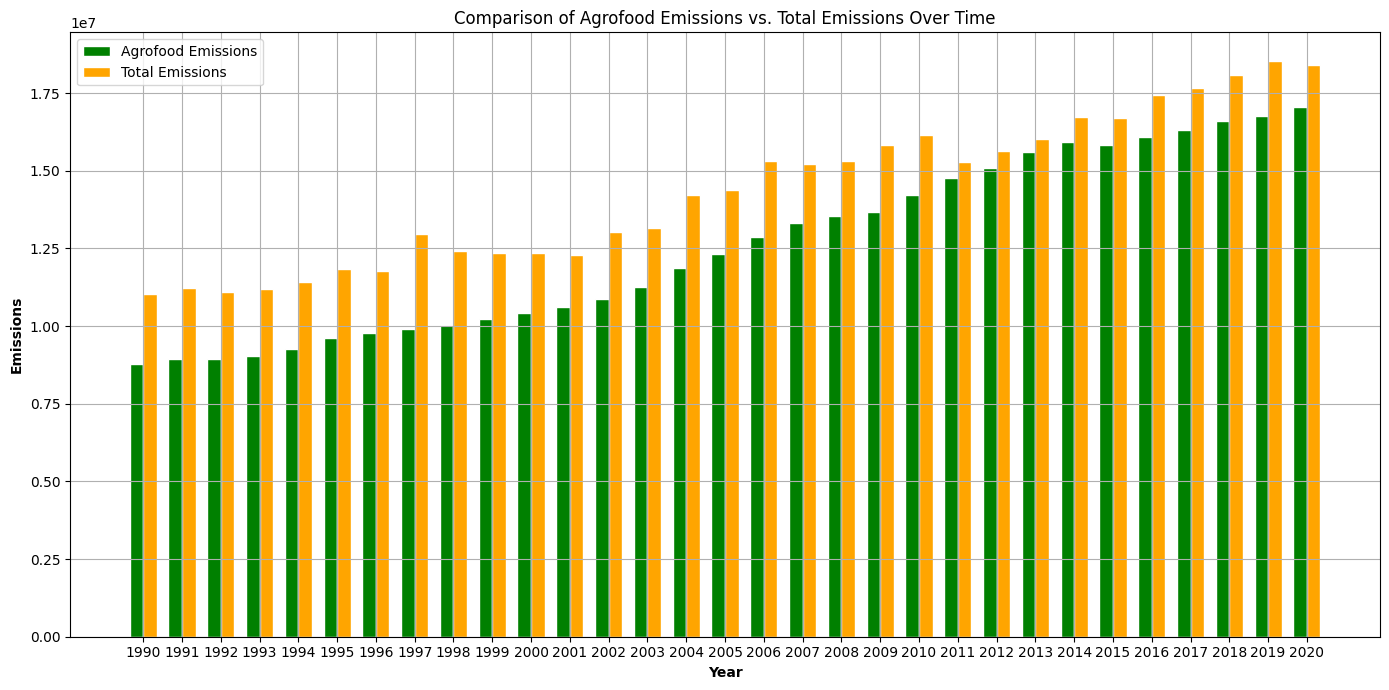

In [ ]:
import numpy as np
# Bar chart (side-by-side)
years = yearly_sums.index
agrofood_emissions = yearly_sums['Agrofood emissions']
total_emissions = yearly_sums['total_emission']

bar_width = 0.35
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(14, 7))
plt.bar(r1, agrofood_emissions, color='green', width=bar_width, edgecolor='white', label='Agrofood Emissions')
plt.bar(r2, total_emissions, color='orange', width=bar_width, edgecolor='white', label='Total Emissions')

    # Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Emissions', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(years))],years)



    # Create legend & Show graphic
plt.title('Comparison of Agrofood Emissions vs. Total Emissions Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

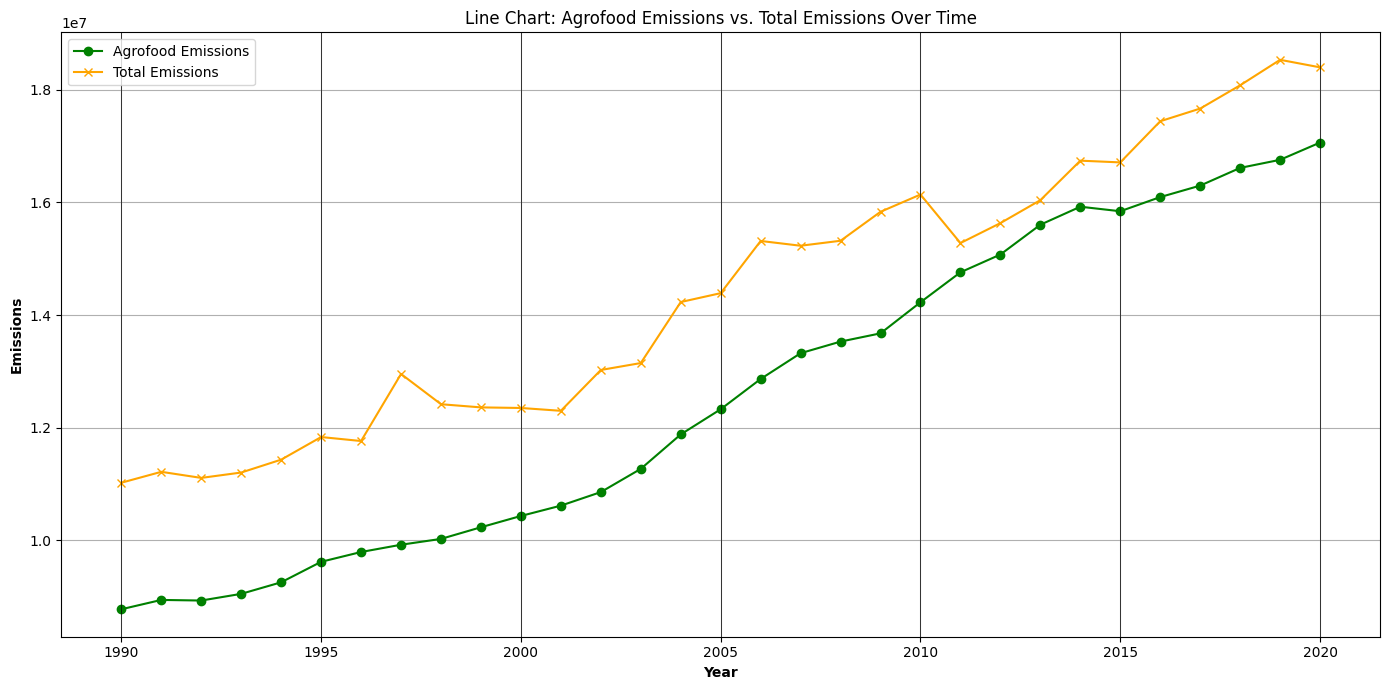

In [ ]:

    # Create the line chart
    plt.figure(figsize=(14, 7))
    plt.plot(years, agrofood_emissions, color='green', label='Agrofood Emissions', marker='o')
    plt.plot(years, total_emissions, color='orange', label='Total Emissions', marker='x')

    # Customize the x-axis
    plt.xlabel('Year', fontweight='bold')
    plt.ylabel('Emissions', fontweight='bold')

    # Customize the grid
    plt.grid(True)

    # Customize grid lines every 5 years
    for year in range(min(years), max(years) + 1):
        if year % 5 == 0:
            plt.axvline(x=year, color='black', linestyle='-', linewidth=0.5)

    # Add legend, title, and layout
    plt.title('Line Chart: Agrofood Emissions vs. Total Emissions Over Time')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

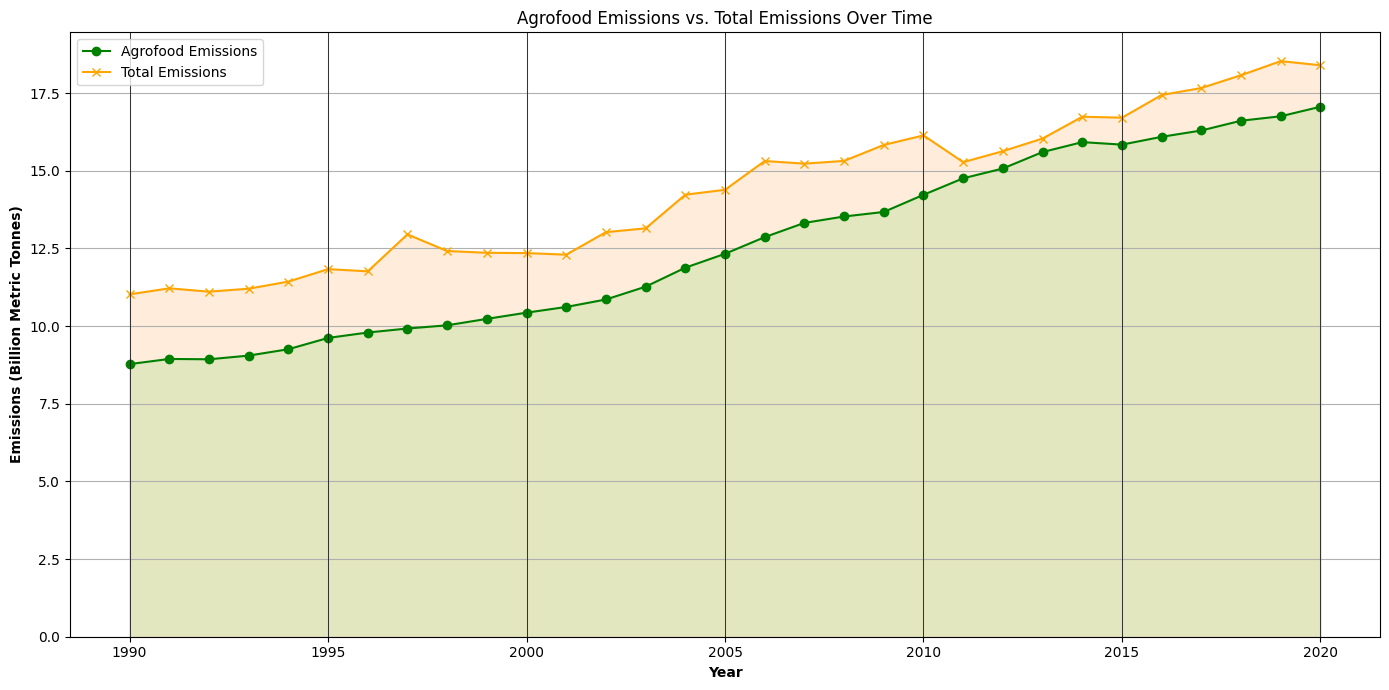

In [ ]:
from matplotlib.ticker import FuncFormatter

conversion_factor = 1e-6  # 1 / 1,000,000
agrofood_emissions_bmt = agrofood_emissions * conversion_factor
total_emissions_bmt = total_emissions * conversion_factor

# Create the figure and axes
fig, ax = plt.subplots(figsize=(14, 7))

    # Plot the lines
ax.plot(years, agrofood_emissions_bmt, color='green', label='Agrofood Emissions', marker='o')
ax.plot(years, total_emissions_bmt, color='orange', label='Total Emissions', marker='x')

    # Fill under the Agrofood Emissions line
ax.fill_between(years, agrofood_emissions_bmt, color='lightgreen', alpha=0.5, label='_nolegend_')

    # Fill under the Total Emissions line
ax.fill_between(years, total_emissions_bmt, color='peachpuff', alpha=0.5, label='_nolegend_')

    # Customize the x-axis
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Emissions (Billion Metric Tonnes)', fontweight='bold')

    # Customize the grid
ax.grid(True)

    # Customize grid lines every 5 years
for year in range(min(years), max(years) + 1):
        if year % 5 == 0:
            ax.axvline(x=year, color='black', linestyle='-', linewidth=0.5)

    # Move the start point of the y-axis to 0
ax.set_ylim(bottom=0)

    # Add legend, title, and layout
ax.set_title('Agrofood Emissions vs. Total Emissions Over Time')
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

#2. Country sums

In [ ]:
# Group by 'Area' and sum the values for each column
area_sums = df.groupby('Area').sum(numeric_only=True)

# Display the result
print(area_sums)

                    Year  Crop Residues  Rice Cultivation  \
Area                                                        
Afghanistan        62155      9819.2319      20235.337900   
Albania            62155      1157.2945       6467.964319   
Algeria            62155      8670.6486         76.322300   
American Samoa     62155         0.0000      35912.514945   
Andorra            62155         0.0000      28716.610633   
...                  ...            ...               ...   
Wallis and Futuna  62155         0.0000     106611.692946   
Western Sahara     62155         0.2000      28358.956608   
Yemen              62155      1838.6347      17404.183981   
Zambia             62155      3304.6189       1090.510700   
Zimbabwe           62155      3553.1982         90.630600   

                   Drained organic soils (CO2)  Pesticides Manufacturing  \
Area                                                                       
Afghanistan                             0.0000        

In [ ]:
# List of columns to sum
columns_to_sum = [
    'Crop Residues', 'Rice Cultivation', 'Drained organic soils (CO2)',
    'Pesticides Manufacturing', 'Food Transport', 'Food Household Consumption',
    'Food Retail', 'Food Packaging', 'Agrifood Systems Waste Disposal',
    'Food Processing', 'Fertilizers Manufacturing', 'IPPU',
    'Manure applied to Soils', 'Manure left on Pasture', 'Manure Management'
]

# Ensure that the specified columns exist in the area_sums DataFrame
if not all(col in area_sums.columns for col in columns_to_sum):
    missing_cols = [col for col in columns_to_sum if col not in area_sums.columns]
    print(f"Error: Columns {missing_cols} are missing in the area_sums DataFrame.")
else:
    # Sum the specified columns and create a new 'Agrofood emissions' column
    area_sums['Agrofood emissions'] = area_sums[columns_to_sum].sum(axis=1)

    # Display the first few rows to verify the new column
    print(area_sums.head())

                 Year  Crop Residues  Rice Cultivation  \
Area                                                     
Afghanistan     62155      9819.2319      20235.337900   
Albania         62155      1157.2945       6467.964319   
Algeria         62155      8670.6486         76.322300   
American Samoa  62155         0.0000      35912.514945   
Andorra         62155         0.0000      28716.610633   

                Drained organic soils (CO2)  Pesticides Manufacturing  \
Area                                                                    
Afghanistan                          0.0000               1168.598220   
Albania                           3403.6926                149.067746   
Algeria                              0.0000               1524.000000   
American Samoa                       0.0000                355.913622   
Andorra                              0.0000                355.913622   

                Food Transport  Food Household Consumption  Food Retail  \
Area  

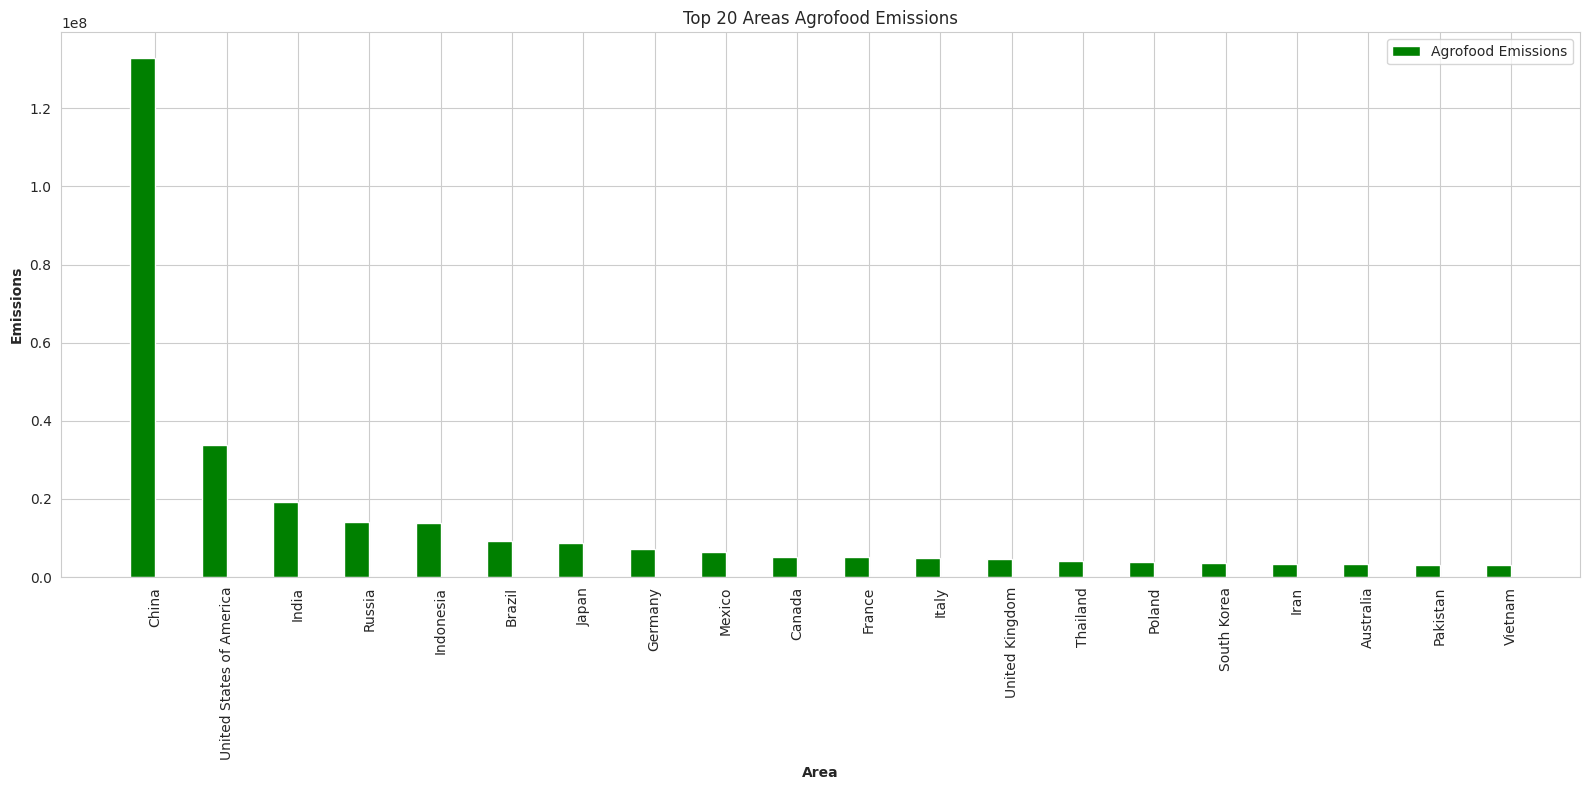

In [ ]:
# Ensure that the columns exist
if 'Agrofood emissions' not in area_sums.columns or 'total_emission' not in area_sums.columns:
  print("Error: 'Agrofood emissions' or 'total_emission' column is missing in area_sums DataFrame.")
else:
    # Sort by agrofood emissions and get the top 20
    area_sums_sorted = area_sums.sort_values('Agrofood emissions', ascending=False)
    top_20_areas = area_sums_sorted.head(20)

    # Prepare data for plotting
    areas = top_20_areas.index
    agrofood_emissions = top_20_areas['Agrofood emissions']
    #total_emissions = top_20_areas['total_emission']

    # Create bar chart data
    bar_width = 0.35
    r1 = np.arange(len(areas))
    r2 = [x + bar_width for x in r1]

    # Create the plot
    plt.figure(figsize=(16, 8))  # Adjust figure size as needed
    plt.bar(r1, agrofood_emissions, color='green', width=bar_width, edgecolor='white', label='Agrofood Emissions')
    #plt.bar(r2, total_emissions, color='orange', width=bar_width, edgecolor='white', label='Total Emissions')

    # Add labels and title
    plt.xlabel('Area', fontweight='bold')
    plt.ylabel('Emissions', fontweight='bold')
    plt.xticks([r + bar_width / 2 for r in range(len(areas))], areas, rotation=90)  # Rotate area labels for readability
    plt.title('Top 20 Areas Agrofood Emissions')

    # Add grid and legend
    plt.grid(True, axis='y')  # Only show horizontal grid lines
    plt.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

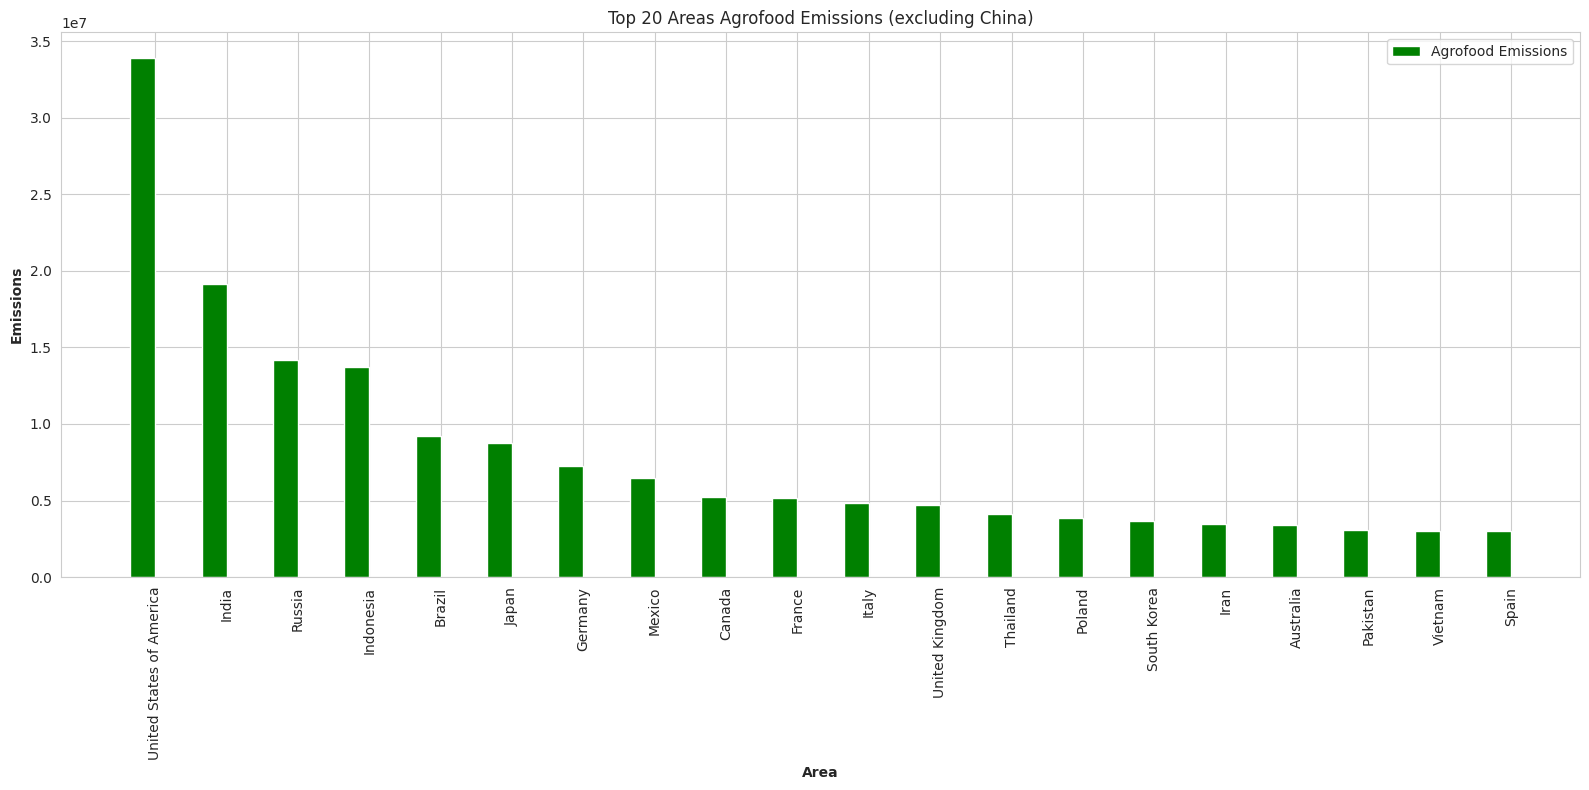

In [ ]:

# Ensure that the columns exist
if 'Agrofood emissions' not in area_sums.columns or 'total_emission' not in area_sums.columns:
    print(
        "Error: 'Agrofood emissions' or 'total_emission' column is missing in area_sums DataFrame."
    )
else:
    # Exclude China from the data
    area_sums_no_china = area_sums[area_sums.index != 'China']

# Sort by agrofood emissions and get the top 20 (excluding China)
    area_sums_sorted = area_sums_no_china.sort_values(
        'Agrofood emissions', ascending=False
    )
    top_20_areas = area_sums_sorted.head(20)

    # Prepare data for plotting
    areas = top_20_areas.index
    agrofood_emissions = top_20_areas['Agrofood emissions']
    #total_emissions = top_20_areas['total_emission']

    # Create bar chart data
    bar_width = 0.35
    r1 = np.arange(len(areas))
    r2 = [x + bar_width for x in r1]

    # Create the plot
    plt.figure(figsize=(16, 8))  # Adjust figure size as needed
    plt.bar(
        r1,
        agrofood_emissions,
        color='green',
        width=bar_width,
        edgecolor='white',
        label='Agrofood Emissions',
    )
    ''' plt.bar(
        r2,
        total_emissions,
        color='orange',
        width=bar_width,
        edgecolor='white',
        label='Total Emissions',
    )'''

    # Add labels and title
    plt.xlabel('Area', fontweight='bold')
    plt.ylabel('Emissions', fontweight='bold')
    plt.xticks(
        [r + bar_width / 2 for r in range(len(areas))], areas, rotation=90
    )  # Rotate area labels for readability
    plt.title(
        'Top 20 Areas Agrofood Emissions (excluding China)'
    )

    # Add grid and legend
    plt.grid(True, axis='y')  # Only show horizontal grid lines
    plt.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

# 3. Agrofood group by Category



In [ ]:
# Define category mappings
categories = {
    "Crop & Soil Management": ["Crop Residues", "Rice Cultivation", "Drained organic soils (CO2)"],
    "Livestock & Manure Management": ["Manure applied to Soils", "Manure left on Pasture", "Manure Management"],
    "Agricultural Inputs & Manufacturing": ["Fertilizers Manufacturing", "Pesticides Manufacturing", "IPPU"],
    "Food Processing & Distribution": ["Food Processing", "Food Packaging", "Food Transport"],
    "Consumer & Waste Management": ["Food Retail", "Food Household Consumption", "Agrifood Systems Waste Disposal"]
}

# Sum emissions for each category
category_sums = {category: df[columns].sum(axis=1) for category, columns in categories.items()}

# Create a new DataFrame with grouped categories and keep Year, Area, Region
df_grouped = df[['Year', 'Area', 'region','sub-region']].copy()  # Retain necessary columns
df_grouped = df_grouped.join(pd.DataFrame(category_sums))  # Merge with aggregated emissions

# Display the result
print(df_grouped.head())



# Save to CSV if needed
#df_grouped.to_csv("grouped_agrofood.csv", index=False)


   Year            Area   region       sub-region  Crop & Soil Management  \
0  1990     Afghanistan     Asia    Southern Asia              891.607700   
1  1990         Albania   Europe  Southern Europe              193.329600   
2  1990         Algeria   Africa  Northern Africa              168.589600   
3  1990  American Samoa  Oceania        Polynesia              926.342278   
4  1990         Andorra   Europe  Southern Europe              926.342278   

   Livestock & Manure Management  Agricultural Inputs & Manufacturing  \
0                    2169.851300                           233.782283   
1                    1054.646200                          1125.636617   
2                    2758.844700                          5288.278000   
3                    2148.251693                          2017.273214   
4                    2294.307917                          1711.187476   

   Food Processing & Distribution  Consumer & Waste Management  
0                      382.960756

#3.1 Category over time

<Figure size 1200x600 with 0 Axes>

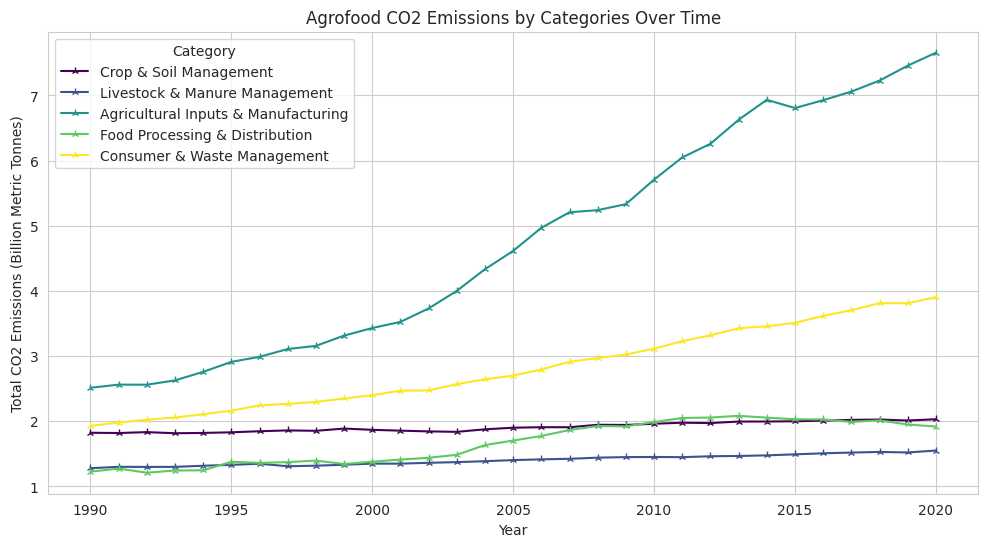

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# 1. Comparison of Categories by Year
plt.figure(figsize=(12, 6))
df_yearly = df_grouped.groupby("Year")[categories].sum()

#conversion to BMT
conversion_factor = 1e-6
df_yearly_bmt=df_yearly*conversion_factor
df_yearly_bmt.plot(kind="line", marker="2", colormap="viridis", figsize=(12, 6))
plt.title("Agrofood CO2 Emissions by Categories Over Time")
plt.ylabel("Total CO2 Emissions (Billion Metric Tonnes)")
plt.xlabel("Year")
plt.legend(title="Category")
plt.grid(True)
plt.show()

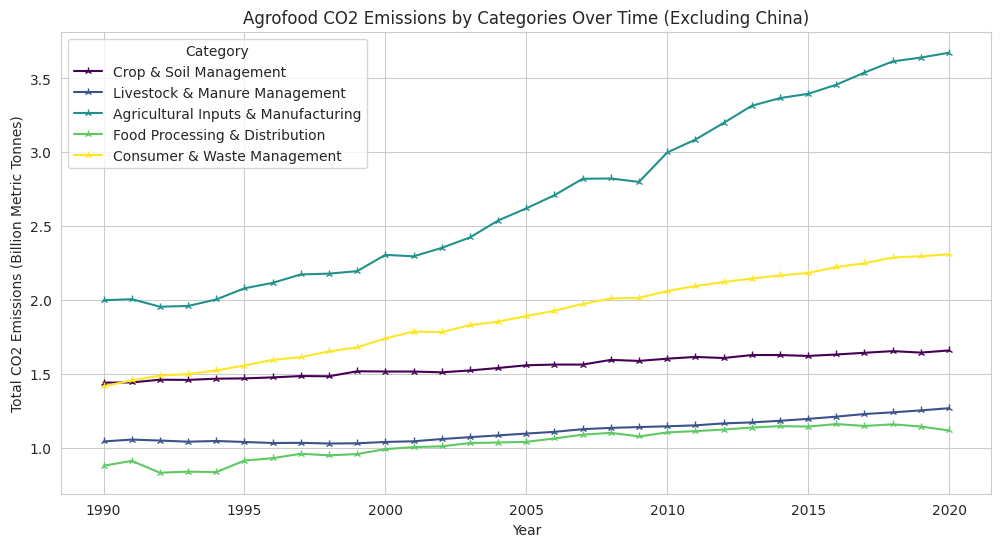

In [ ]:
#Category over time exclude China
# Set plot style
sns.set_style("whitegrid")

# Filter out rows where 'Area' is 'China'
df_grouped_no_china = df_grouped[df_grouped['Area'] != 'China']

# Group by "Year" and sum the emission categories, excluding China
df_yearly = df_grouped_no_china.groupby("Year")[categories].sum()

# Plotting
#plt.figure(figsize=(12, 6))
#df_yearly.plot(kind="line", marker="2", colormap="viridis", figsize=(12, 6))

conversion_factor = 1e-6
df_yearly_bmt=df_yearly*conversion_factor
df_yearly_bmt.plot(kind="line", marker="2", colormap="viridis", figsize=(12, 6))

plt.title("Agrofood CO2 Emissions by Categories Over Time (Excluding China)")
plt.ylabel("Total CO2 Emissions (Billion Metric Tonnes)")
plt.xlabel("Year")
plt.legend(title="Category")
plt.grid(True)
plt.show()

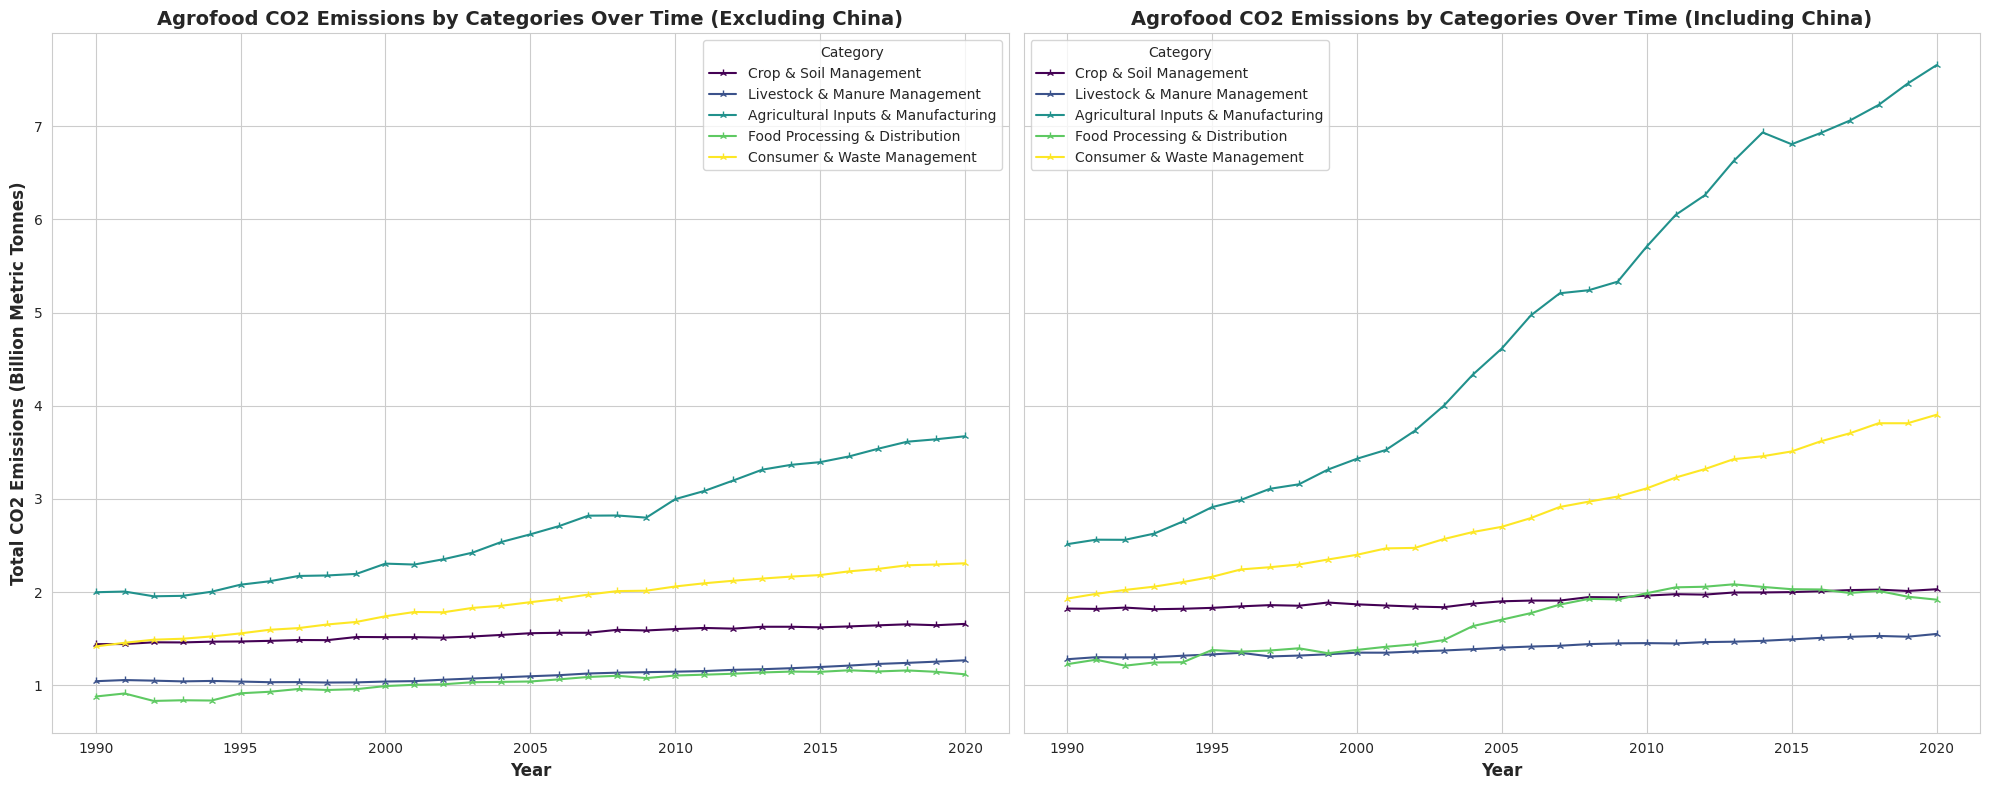

In [ ]:


# Set plot style
sns.set_style("whitegrid")

# --- Data Preparation ---

# Category over time excluding China
df_grouped_no_china = df_grouped[df_grouped['Area'] != 'China']
df_yearly_no_china = df_grouped_no_china.groupby("Year")[categories].sum()

# Comparison of Categories by Year (including China)
df_yearly_with_china = df_grouped.groupby("Year")[categories].sum()

# Conversion to Billion Metric Tonnes (BMT)
conversion_factor = 1e-6
df_yearly_bmt_no_china = df_yearly_no_china * conversion_factor
df_yearly_bmt_with_china = df_yearly_with_china * conversion_factor

# --- Plotting ---

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)  # 1 row, 2 columns, share y-axis

# --- Plot 1: Excluding China ---
df_yearly_bmt_no_china.plot(kind="line", marker="2", colormap="viridis", ax=axes[0])
axes[0].set_title("Agrofood CO2 Emissions by Categories Over Time (Excluding China)",fontweight='bold', fontsize=14)
axes[0].set_ylabel("Total CO2 Emissions (Billion Metric Tonnes)",fontweight='bold', fontsize=12)
axes[0].set_xlabel("Year",fontweight='bold', fontsize=12)
axes[0].legend(title="Category")
axes[0].grid(True)

# --- Plot 2: Including China ---
df_yearly_bmt_with_china.plot(kind="line", marker="2", colormap="viridis", ax=axes[1])
axes[1].set_title("Agrofood CO2 Emissions by Categories Over Time (Including China)",fontweight='bold', fontsize=14)
axes[1].set_xlabel("Year",fontweight='bold', fontsize=12)
axes[1].legend(title="Category")
axes[1].grid(True)
#Adjust label size
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# 3.2 Category by Region

<Figure size 1800x600 with 0 Axes>

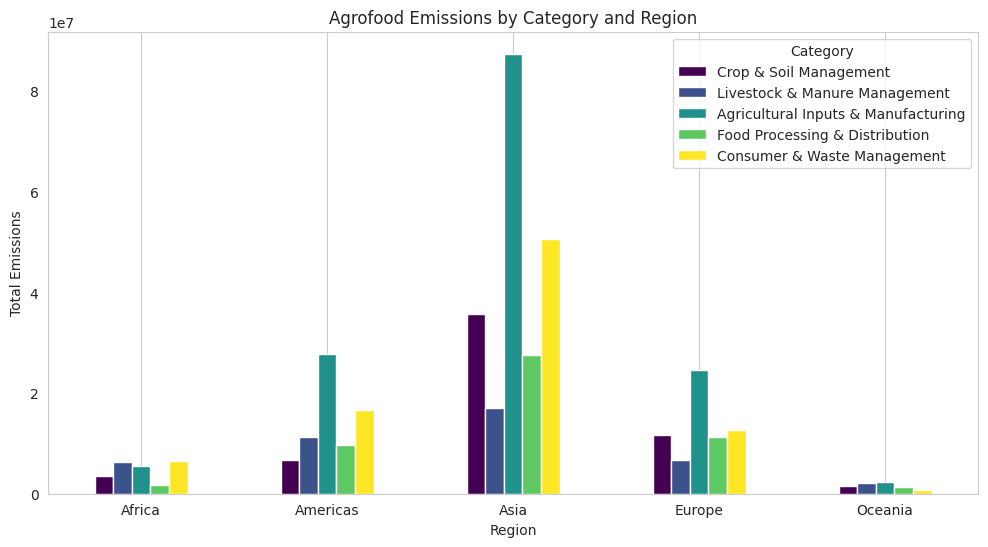

In [ ]:
### 2. Comparison of Categories by Region ###
plt.figure(figsize=(18, 6))
df_region = df_grouped.groupby("region")[categories].sum()
df_region.plot(kind="bar", colormap="viridis", figsize=(12, 6))
plt.title("Agrofood Emissions by Category and Region")
plt.ylabel("Total Emissions")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.grid(axis="y")
plt.show()

<Figure size 1800x600 with 0 Axes>

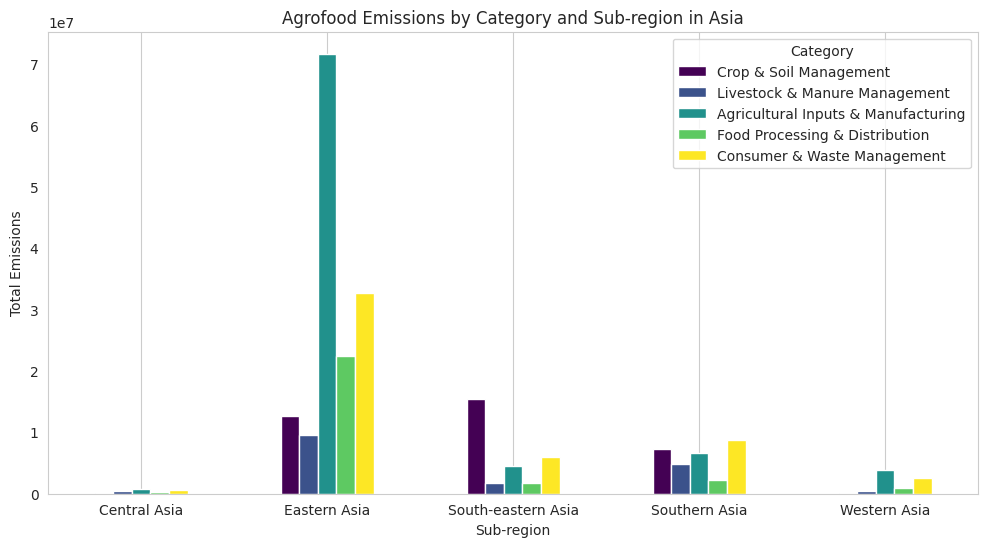

In [ ]:
#Agrofood Emissions by Category and Sub-region in Asia

# Filter for Asia region
df_asia = df_grouped[df_grouped['region'] == 'Asia'].copy()

# Group by sub-region and sum the categories
df_subregion = df_asia.groupby("sub-region")[categories].sum(numeric_only=True)


plt.figure(figsize=(18, 6))
df_subregion.plot(kind="bar", colormap="viridis", figsize=(12, 6))


plt.title("Agrofood Emissions by Category and Sub-region in Asia")
plt.ylabel("Total Emissions")
plt.xlabel("Sub-region")
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.legend(title="Category")
plt.grid(axis="y")  # Add gridlines along the y-axis
#plt.tight_layout()
plt.show()

#China influence region data (outlier)

<Figure size 1800x600 with 0 Axes>

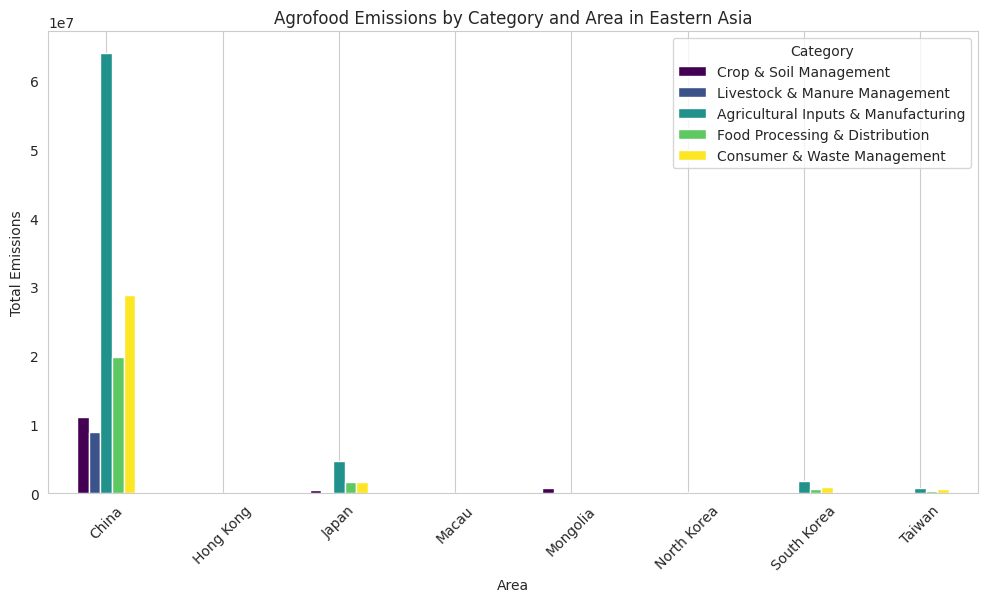

In [ ]:
#Agrofood Emissions by Category and Area in Eastern Asia

# Filter for Asia region
df_asia = df_grouped[df_grouped['sub-region'] == 'Eastern Asia'].copy()

# Group by sub-region and sum the categories
df_eastern_asia = df_asia.groupby("Area")[categories].sum(numeric_only=True)


plt.figure(figsize=(18, 6))
df_eastern_asia.plot(kind="bar", colormap="viridis", figsize=(12, 6))


plt.title("Agrofood Emissions by Category and Area in Eastern Asia")
plt.ylabel("Total Emissions")
plt.xlabel("Area")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Category")
plt.grid(axis="y")  # Add gridlines along the y-axis
#plt.tight_layout()
plt.show()

#Prepare China excluded data (considered China as another region)

In [ ]:
df_grouped_ex = df_grouped.copy()

# Change the 'region' value to 'China' where 'Area' is 'China'
df_grouped_ex.loc[df_grouped_ex['Area'] == 'China', 'region'] = 'China'


In [ ]:
# Filter the DataFrame to find rows where 'Area' is 'China'
china_rows = df_grouped_ex[df_grouped_ex['Area'] == 'China']

# Select only the 'Area', 'region', and 'sub-region' columns from the filtered rows
selected_columns = china_rows[['Area', 'region', 'sub-region']]

# Display the selected columns
if not selected_columns.empty:
    print("Area, region, and sub-region where Area is 'China':")
    print(selected_columns)
else:
    print("No rows found where 'Area' is 'China'.")

Area, region, and sub-region where Area is 'China':
       Area region    sub-region
36    China  China  Eastern Asia
233   China  China  Eastern Asia
438   China  China  Eastern Asia
657   China  China  Eastern Asia
878   China  China  Eastern Asia
1099  China  China  Eastern Asia
1320  China  China  Eastern Asia
1541  China  China  Eastern Asia
1762  China  China  Eastern Asia
1983  China  China  Eastern Asia
2205  China  China  Eastern Asia
2428  China  China  Eastern Asia
2651  China  China  Eastern Asia
2874  China  China  Eastern Asia
3097  China  China  Eastern Asia
3320  China  China  Eastern Asia
3543  China  China  Eastern Asia
3767  China  China  Eastern Asia
3991  China  China  Eastern Asia
4215  China  China  Eastern Asia
4439  China  China  Eastern Asia
4663  China  China  Eastern Asia
4887  China  China  Eastern Asia
5112  China  China  Eastern Asia
5337  China  China  Eastern Asia
5562  China  China  Eastern Asia
5787  China  China  Eastern Asia
6012  China  China  East

In [ ]:
# Define category names
categories = [
    "Crop & Soil Management",
    "Livestock & Manure Management",
    "Agricultural Inputs & Manufacturing",
    "Food Processing & Distribution",
    "Consumer & Waste Management"
]

<Figure size 1200x600 with 0 Axes>

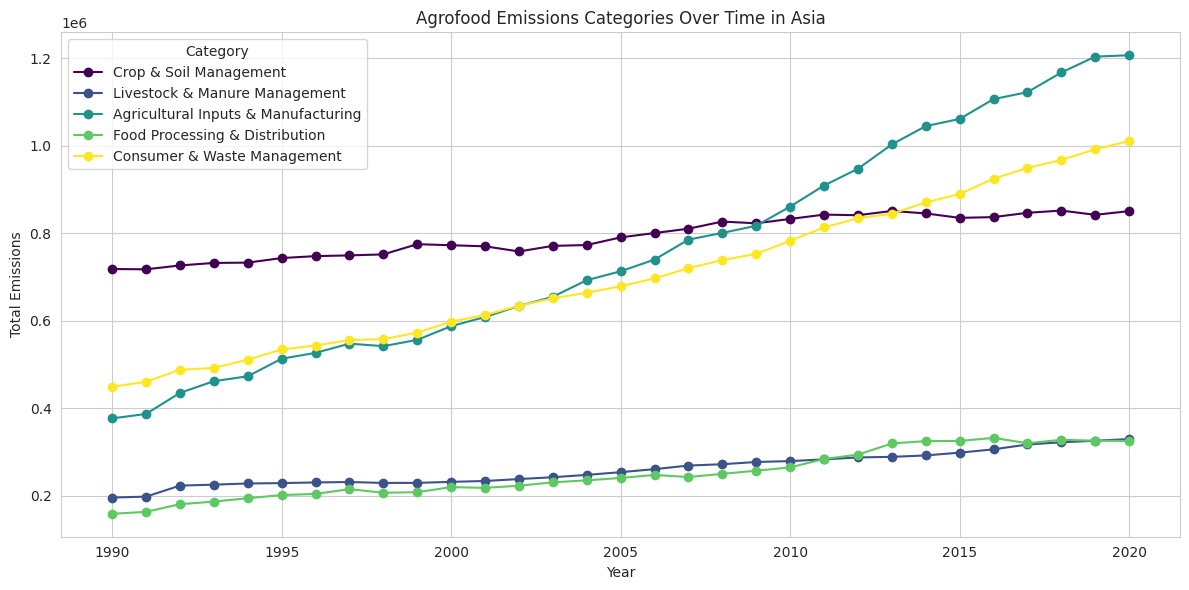

<Figure size 1200x600 with 0 Axes>

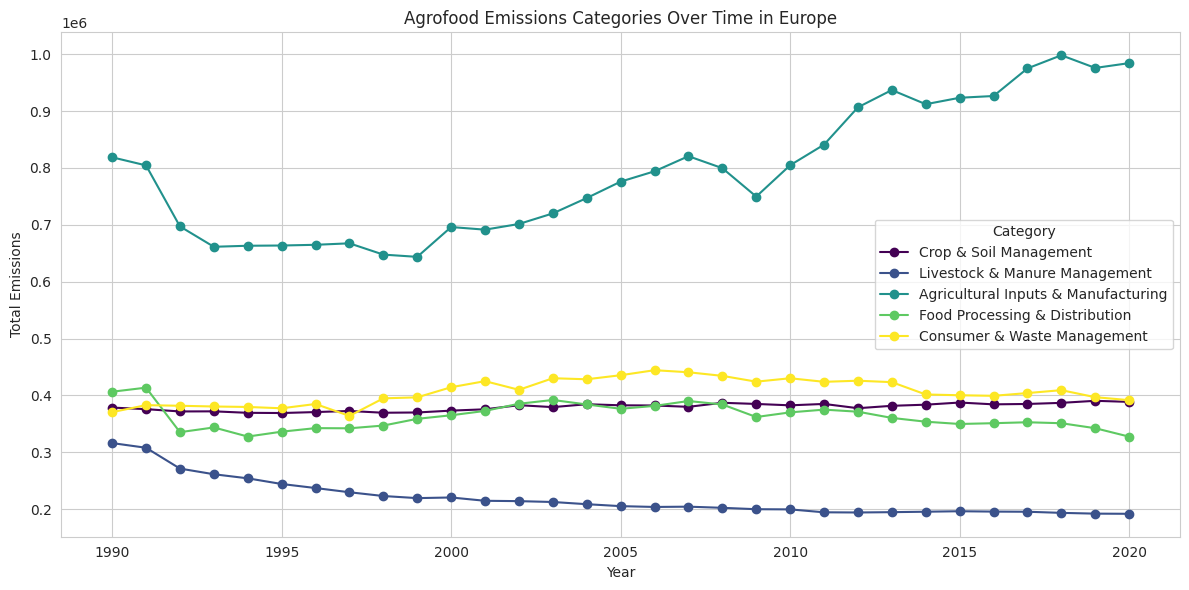

<Figure size 1200x600 with 0 Axes>

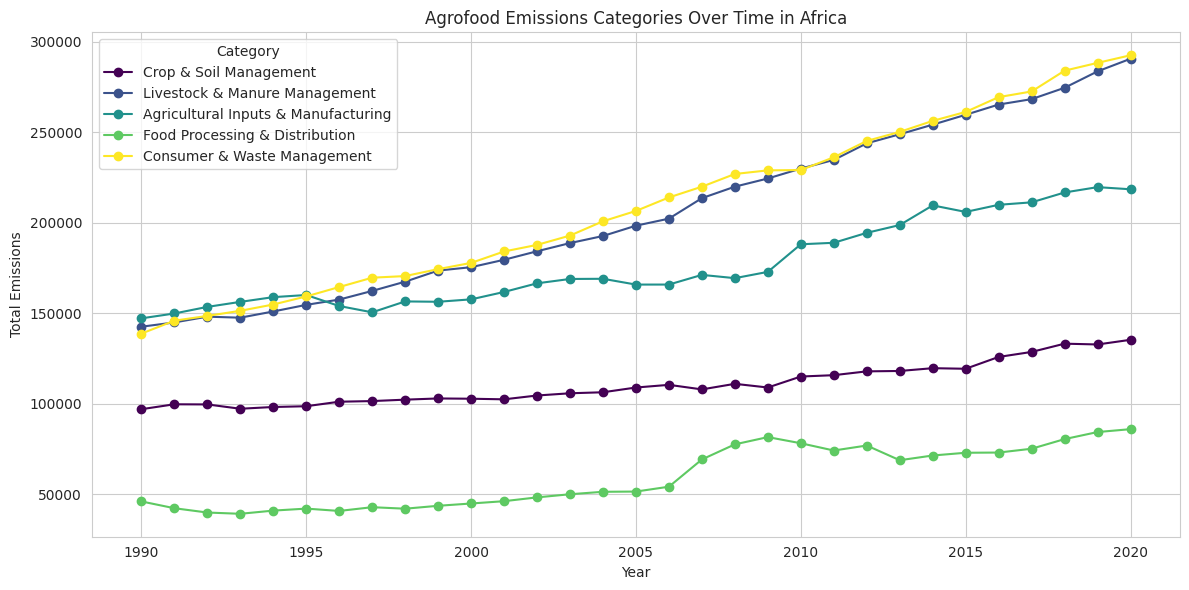

<Figure size 1200x600 with 0 Axes>

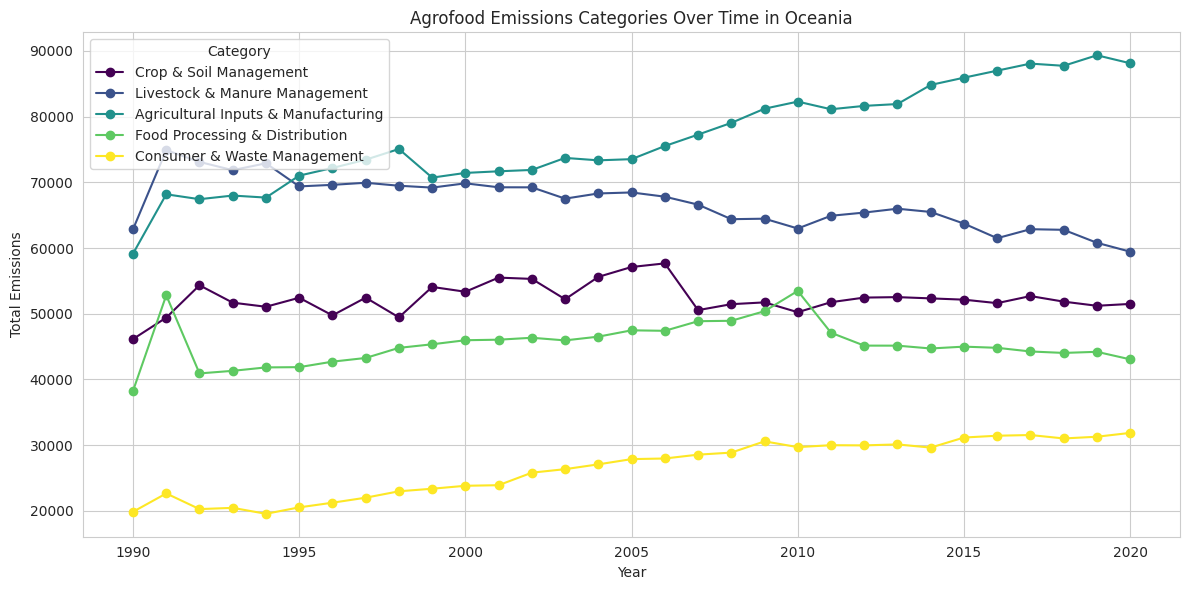

<Figure size 1200x600 with 0 Axes>

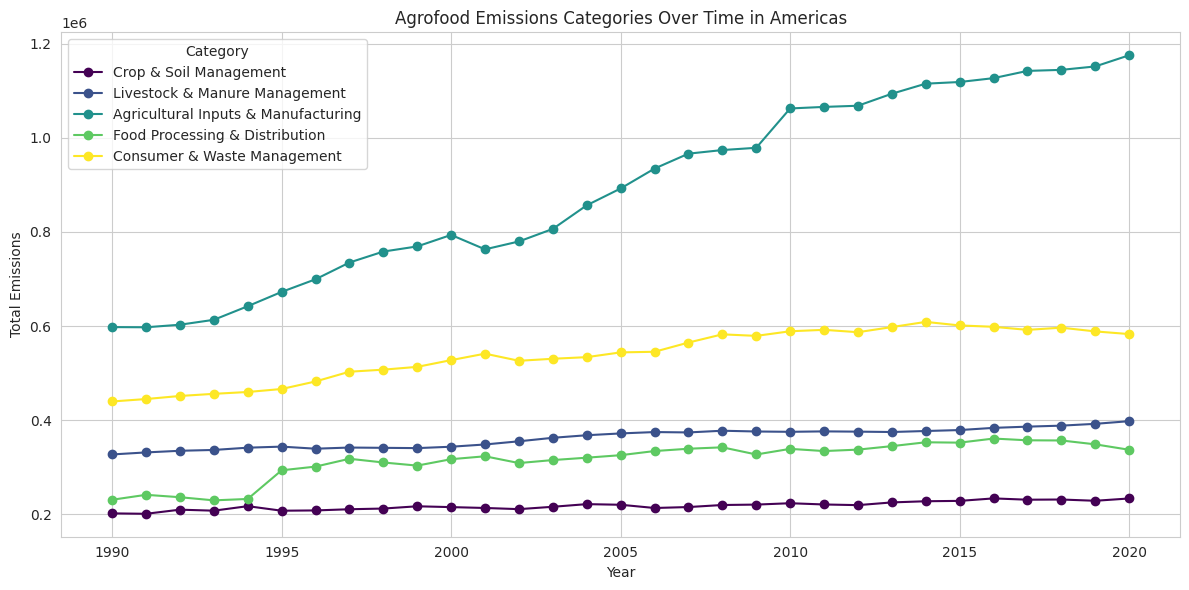

<Figure size 1200x600 with 0 Axes>

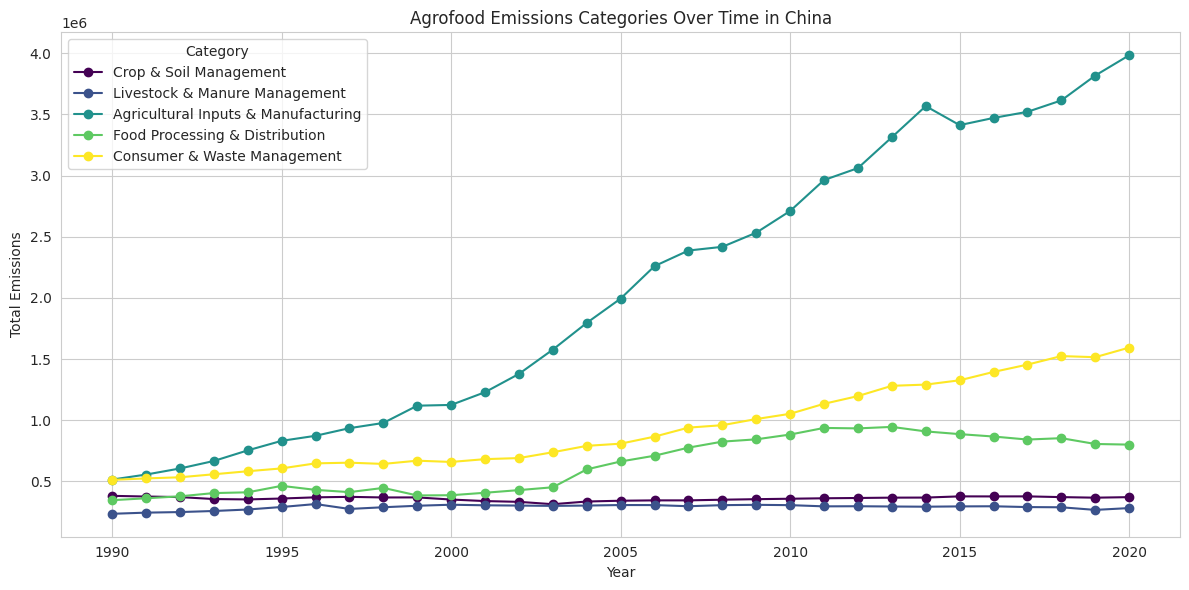

In [ ]:
#Line graphs of catergories over time by region (china separated)

# Set plot style
sns.set_style("whitegrid")

# Create a list of unique regions
regions = df_grouped_ex['region'].unique()

# Iterate through each region and create a line graph
for region in regions:
    # Filter data for the current region
    df_region = df_grouped_ex[df_grouped_ex['region'] == region]

    # Group by 'Year' and sum the emissions for each category
    df_yearly = df_region.groupby("Year")[categories].sum()

    # Create the line graph
    plt.figure(figsize=(12, 6))
    df_yearly.plot(kind="line", marker="o", colormap="viridis", figsize=(12, 6))

    plt.title(f"Agrofood Emissions Categories Over Time in {region}")
    plt.ylabel("Total Emissions")
    plt.xlabel("Year")
    plt.legend(title="Category")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#China separated graphs (use df_grouped_ex)

<Figure size 1800x600 with 0 Axes>

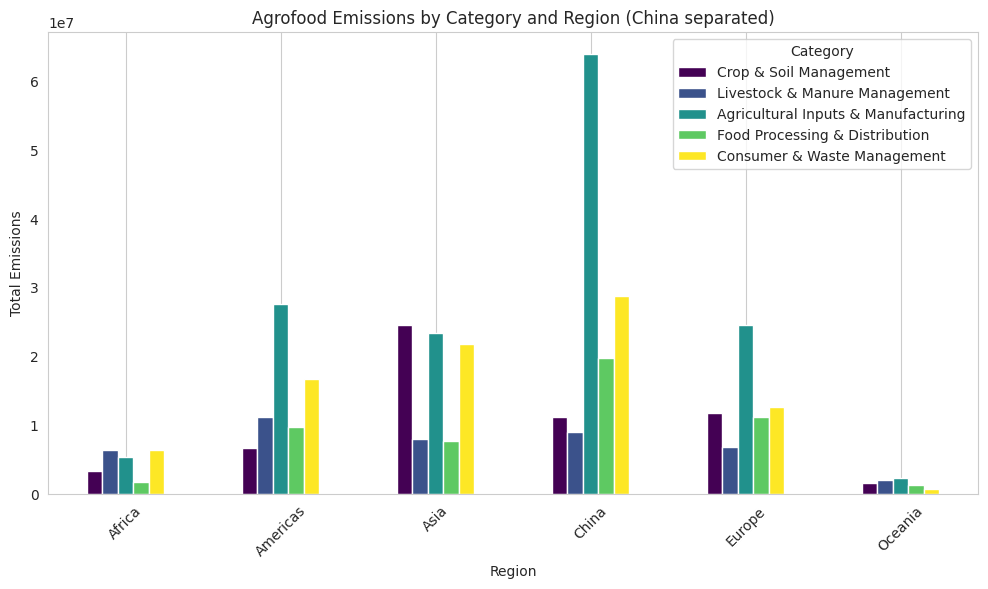

In [ ]:
#Comparison of Categories by Region (China separated)
plt.figure(figsize=(18, 6))
df_region = df_grouped_ex.groupby("region")[categories].sum()
df_region.plot(kind="bar", colormap="viridis", figsize=(12, 6))
plt.title("Agrofood Emissions by Category and Region (China separated)")
plt.ylabel("Total Emissions")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.grid(axis="y")
plt.show()

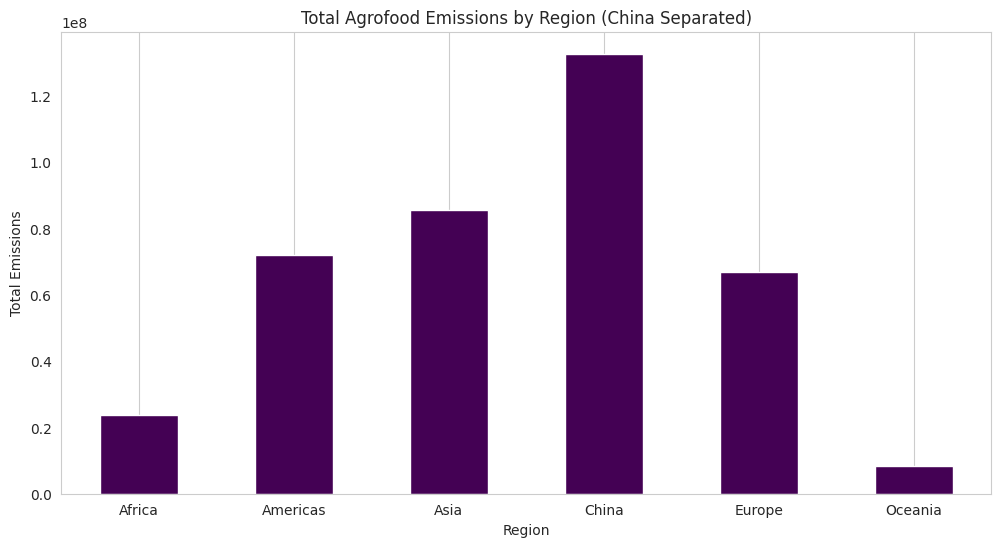

In [ ]:
# Sum across categories to get total Agrofood emissions per region
df_region = df_grouped_ex.groupby("region")[categories].sum()
df_region['Agrofood Emissions'] = df_region.sum(axis=1)

# Create the bar plot
plt.figure(figsize=(12, 6))
df_region['Agrofood Emissions'].plot(kind="bar", colormap="viridis")
plt.title("Total Agrofood Emissions by Region (China Separated)")
plt.ylabel("Total Emissions")
plt.xlabel("Region")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.show()

<Figure size 1600x1000 with 0 Axes>

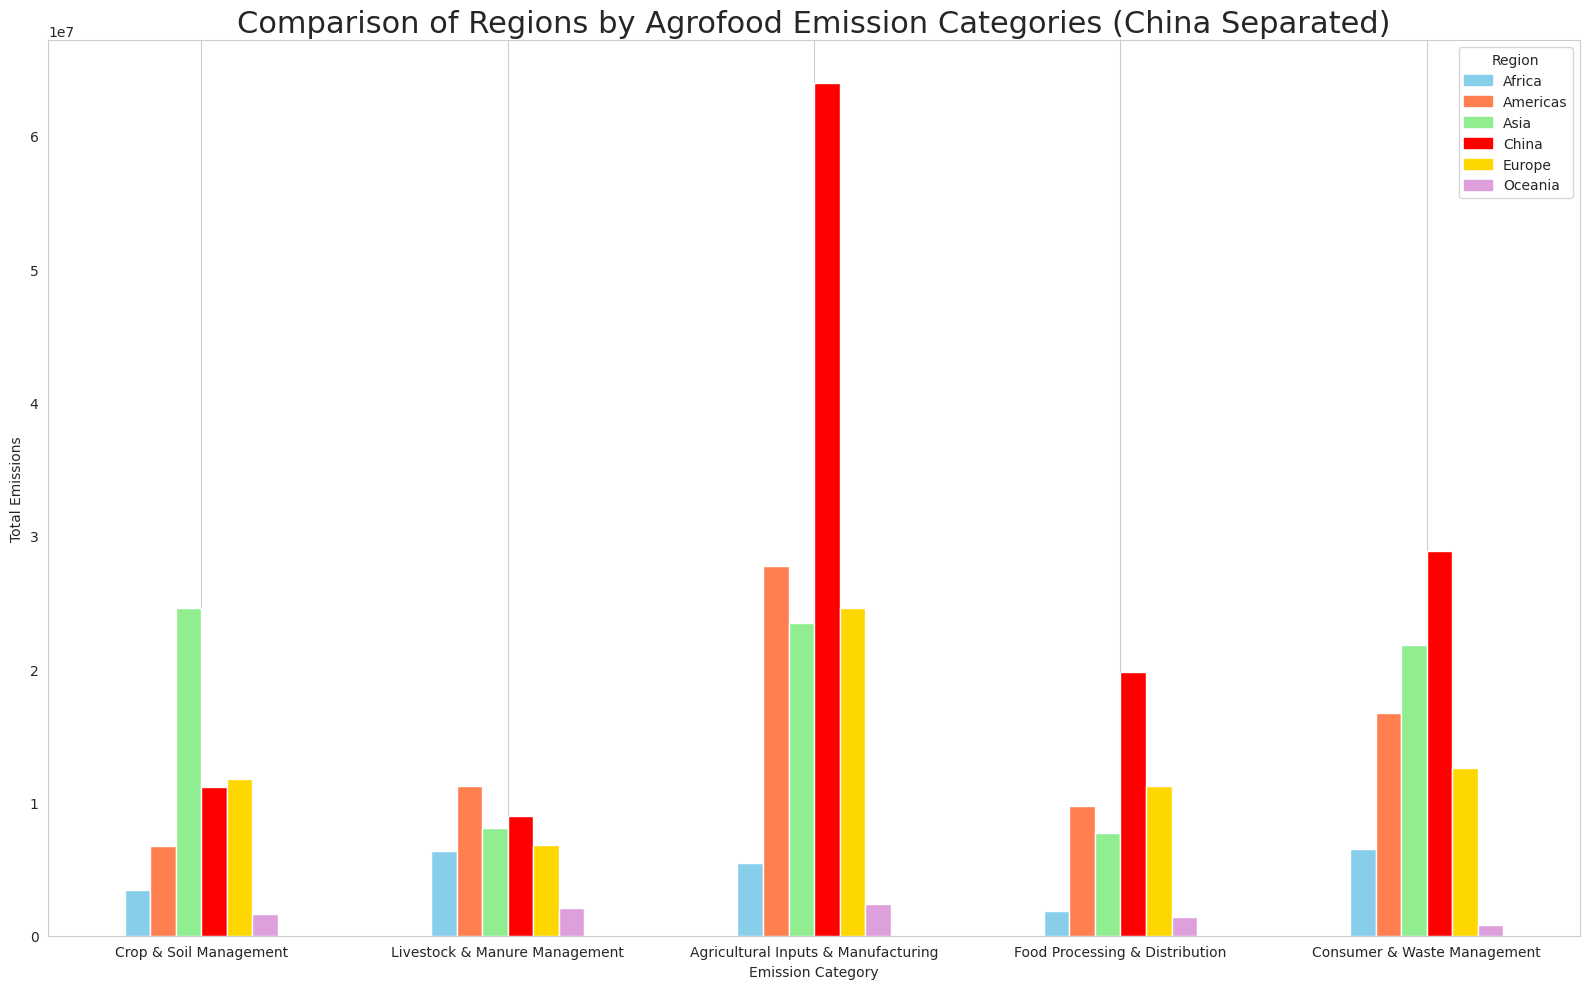

In [ ]:
# Group by region and sum the emissions for each category
df_region = df_grouped_ex.groupby("region")[categories].sum()

# Transpose the DataFrame to have categories as rows and regions as columns
df_region_transposed = df_region.transpose()

# Define a custom color map for the regions
region_colors = {
    "Africa": "skyblue",
    "Americas": "coral",
    "Asia": "lightgreen",
    "Europe": "gold",
    "Oceania": "plum",
    "China": "red",
}

# Get the list of regions in the correct order
regions = df_region_transposed.columns

# Create a list of colors based on the order of regions in the DataFrame
colors = [region_colors.get(region, "gray") for region in regions]

# Plotting
plt.figure(figsize=(16, 10))
ax = df_region_transposed.plot(kind="bar", color=colors, figsize=(16, 10))

# Customize the plot
plt.title(
    "Comparison of Regions by Agrofood Emission Categories (China Separated)",
    fontsize=22,  # Increase font size here
)
plt.ylabel("Total Emissions")
plt.xlabel("Emission Category")
plt.xticks(rotation=0)

# Create a custom legend with the correct colors
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=region_colors[region])
    for region in regions
]
plt.legend(legend_handles, regions, title="Region")

plt.grid(axis="y")
plt.tight_layout()
plt.show()

<Figure size 1600x1000 with 0 Axes>

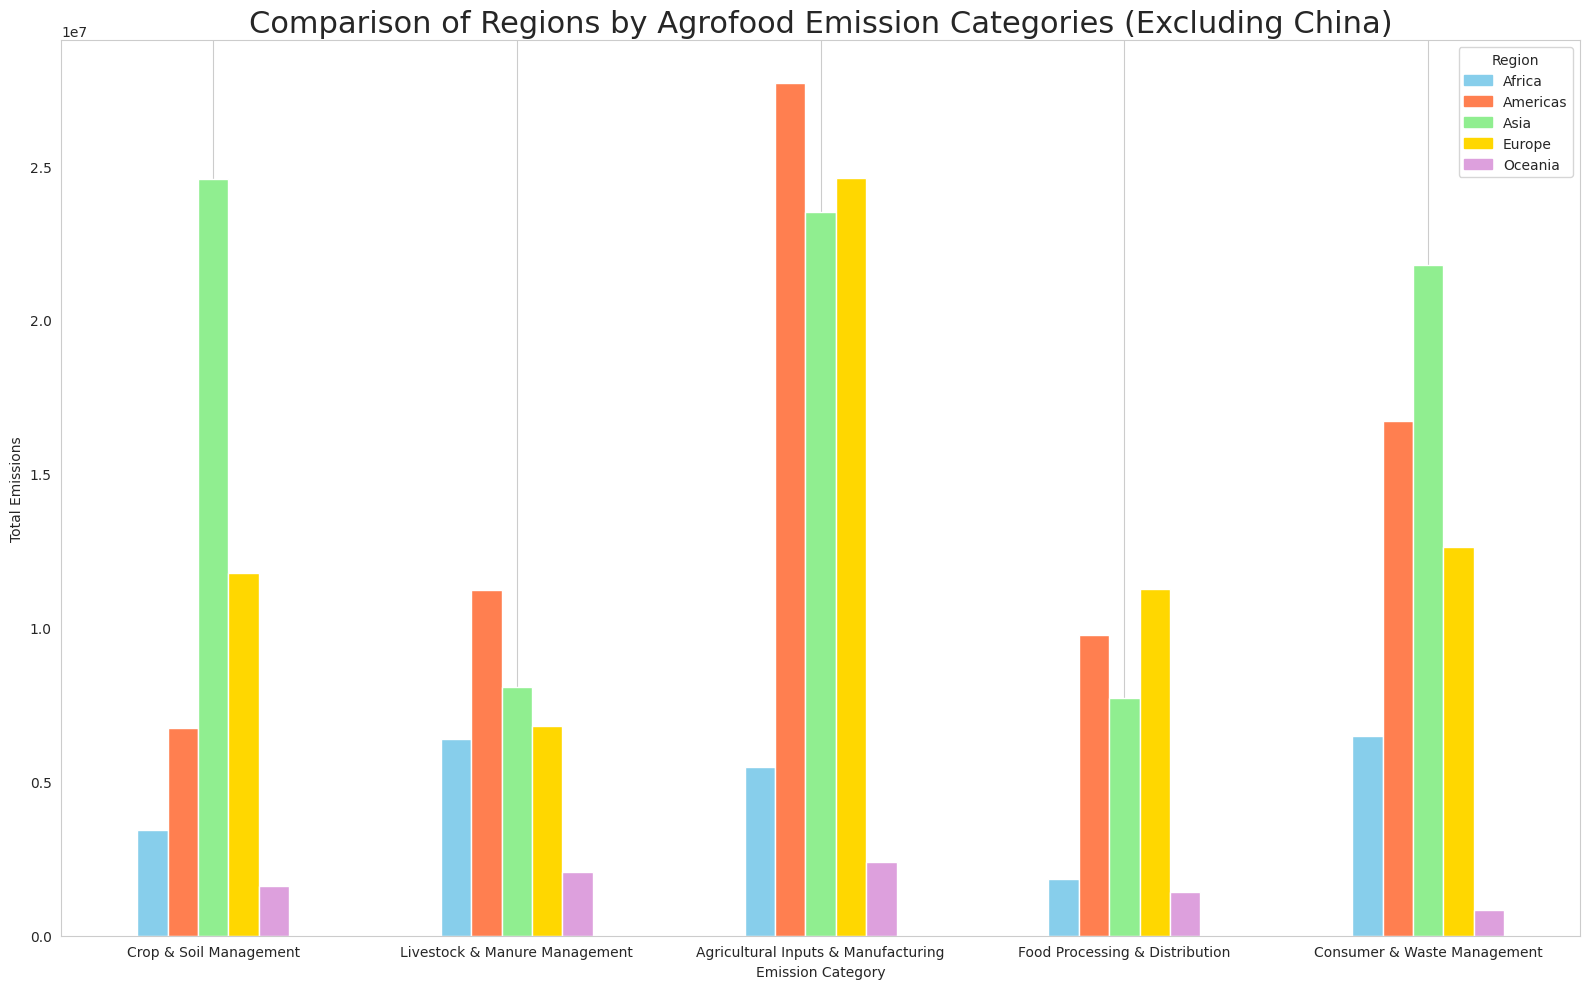

In [ ]:
# Exclude China from the data


df_grouped_no_china = df_grouped_ex[df_grouped_ex['region'] != 'China']

# Group by region and sum the emissions for each category
df_region = df_grouped_no_china.groupby("region")[categories].sum()

# Transpose the DataFrame to have categories as rows and regions as columns
df_region_transposed = df_region.transpose()

# Define a custom color map for the regions (excluding China)
region_colors = {
    "Africa": "skyblue",
    "Americas": "coral",
    "Asia": "lightgreen",
    "Europe": "gold",
    "Oceania": "plum",
}

# Get the list of regions in the correct order
regions = df_region_transposed.columns

# Create a list of colors based on the order of regions in the DataFrame
colors = [region_colors.get(region, "gray") for region in regions]

# Plotting
plt.figure(figsize=(16, 10))
ax = df_region_transposed.plot(kind="bar", color=colors, figsize=(16, 10))

# Customize the plot
plt.title(
    "Comparison of Regions by Agrofood Emission Categories (Excluding China)",
    fontsize=22,
)
plt.ylabel("Total Emissions")
plt.xlabel("Emission Category")
plt.xticks(rotation=0)

# Create a custom legend with the correct colors
legend_handles = [
    plt.Rectangle((0, 0), 1, 1, color=region_colors[region])
    for region in regions
]
plt.legend(legend_handles, regions, title="Region")

plt.grid(axis="y")
plt.tight_layout()
plt.show()

<Figure size 1800x600 with 0 Axes>

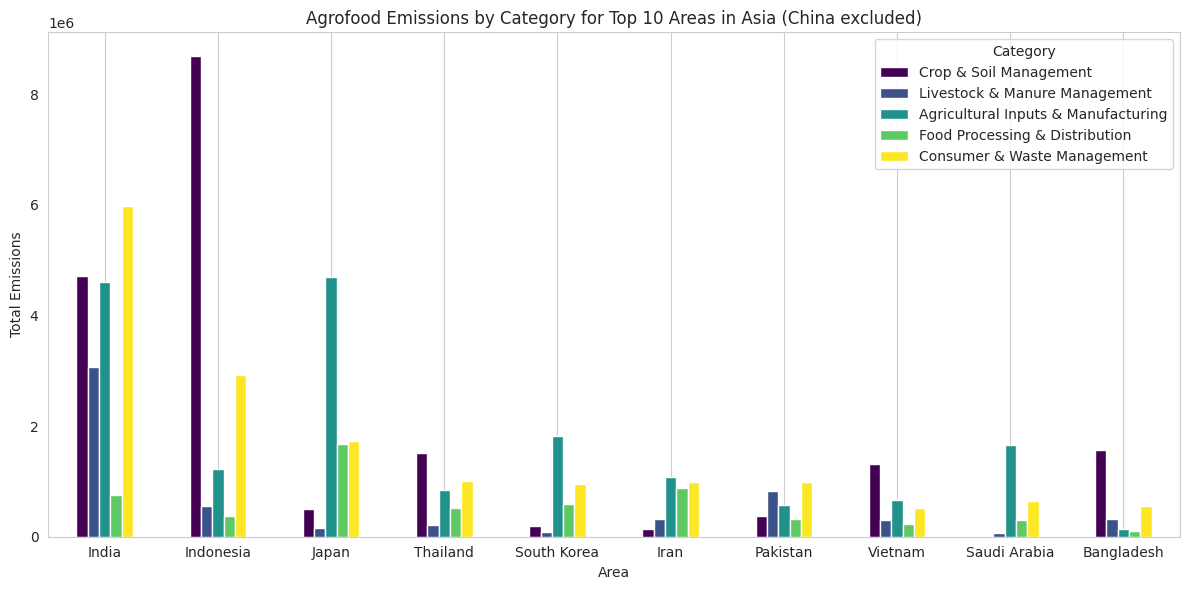

In [ ]:
# Filter for the 'Asia' region
df_asia = df_grouped_ex[df_grouped_ex['region'] == 'Asia'].copy()

# Group by 'Area' and sum the categories
df_area = df_asia.groupby("Area")[categories].sum(numeric_only=True)

# Calculate the total emissions per area
df_area['Total Emissions'] = df_area.sum(axis=1)

# Sort by total emissions and get the top 10
top_10_areas = df_area.sort_values('Total Emissions', ascending=False).head(10)

# Remove the 'Total Emissions' column before plotting
top_10_areas = top_10_areas.drop(columns=['Total Emissions'])

# Create the bar plot for the top 10 areas
plt.figure(figsize=(18, 6))
top_10_areas.plot(kind="bar", colormap="viridis", figsize=(12, 6))

plt.title("Agrofood Emissions by Category for Top 10 Areas in Asia (China excluded)")
plt.ylabel("Total Emissions")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

<Figure size 1800x600 with 0 Axes>

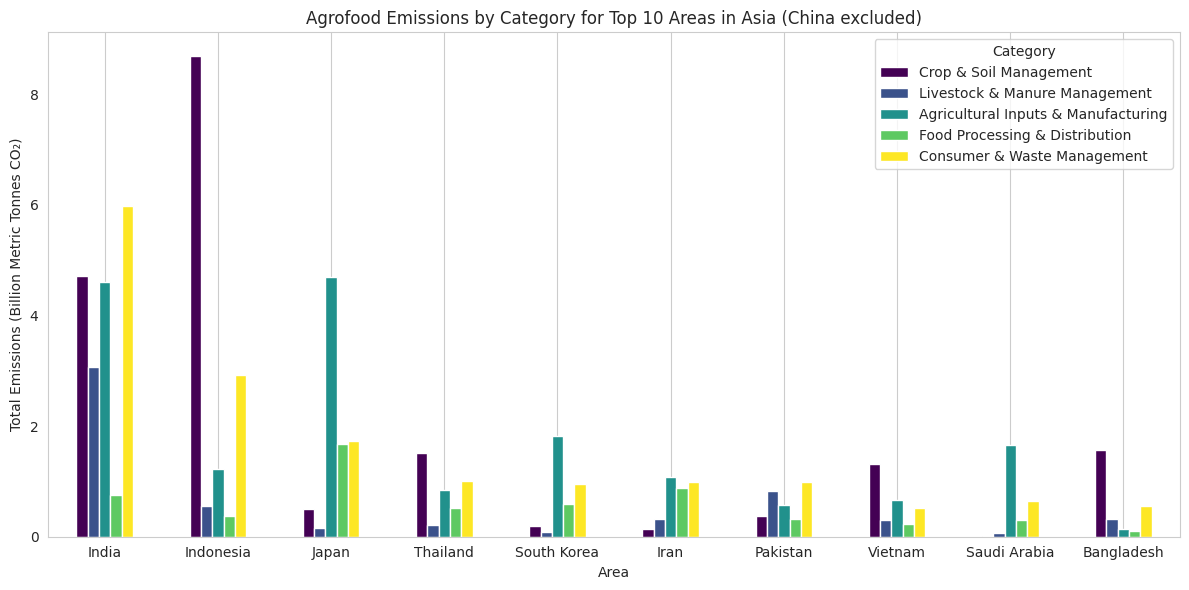

In [ ]:
# Conversion factor from kilotonnes to billion metric tonnes
conversion_factor = 1e-6

# Filter for the 'Asia' region
df_asia = df_grouped_ex[df_grouped_ex['region'] == 'Asia'].copy()

# Group by 'Area' and sum the categories
df_area = df_asia.groupby("Area")[categories].sum(numeric_only=True)

# Convert the emissions to billion metric tonnes
df_area = df_area * conversion_factor

# Calculate the total emissions per area in billion metric tonnes
df_area['Total Emissions'] = df_area.sum(axis=1)

# Sort by total emissions and get the top 10
top_10_areas = df_area.sort_values('Total Emissions', ascending=False).head(10)

# Remove the 'Total Emissions' column before plotting
top_10_areas = top_10_areas.drop(columns=['Total Emissions'])

# Create the bar plot for the top 10 areas
plt.figure(figsize=(18, 6))
top_10_areas.plot(kind="bar", colormap="viridis", figsize=(12, 6))

plt.title("Agrofood Emissions by Category for Top 10 Areas in Asia (China excluded)")
plt.ylabel("Total Emissions (Billion Metric Tonnes CO₂)")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


<Figure size 1800x600 with 0 Axes>

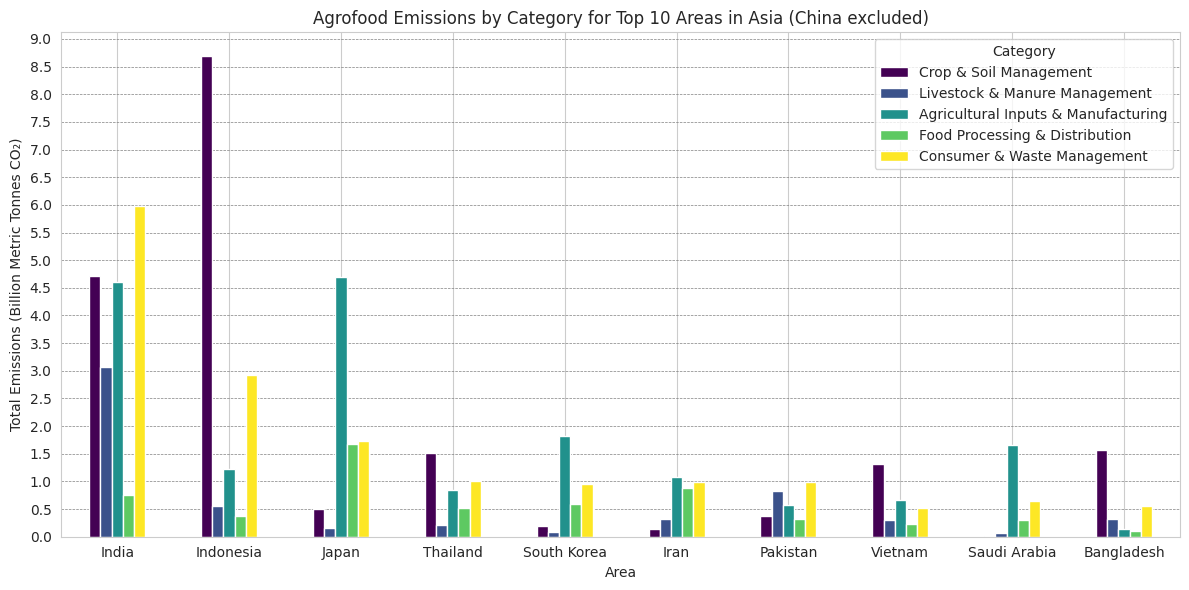

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Conversion factor from kilotonnes to billion metric tonnes
conversion_factor = 1e-6

# Filter for the 'Asia' region
df_asia = df_grouped_ex[df_grouped_ex['region'] == 'Asia'].copy()

# Group by 'Area' and sum the categories
df_area = df_asia.groupby("Area")[categories].sum(numeric_only=True)

# Convert the emissions to billion metric tonnes
df_area = df_area * conversion_factor

# Calculate the total emissions per area in billion metric tonnes
df_area['Total Emissions'] = df_area.sum(axis=1)

# Sort by total emissions and get the top 10
top_10_areas = df_area.sort_values('Total Emissions', ascending=False).head(10)

# Remove the 'Total Emissions' column before plotting
top_10_areas = top_10_areas.drop(columns=['Total Emissions'])

# Create the bar plot for the top 10 areas
plt.figure(figsize=(18, 6))
top_10_areas.plot(kind="bar", colormap="viridis", figsize=(12, 6))

# Customize the plot title, labels, etc.
plt.title("Agrofood Emissions by Category for Top 10 Areas in Asia (China excluded)")
plt.ylabel("Total Emissions (Billion Metric Tonnes CO₂)")
plt.xlabel("Area")
plt.xticks(rotation=0)
plt.legend(title="Category")

# Add grey gridlines to the background
plt.grid(True, which='both', axis='y', color='grey', linestyle='--', linewidth=0.5)

# Double the frequency of the y-axis gridlines
ax = plt.gca()  # Get current axis
ax.yaxis.set_major_locator(MultipleLocator(0.5))  # Adjust the step to double the frequency

# Adjust layout to fit everything
plt.tight_layout()

# Show the plot
plt.show()
